In [2]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
## Display max columns
pd.set_option('display.max_columns', None)

In [4]:
## Loading the Dataset
data = pd.read_csv('amcat_data.csv')
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
## Drop the 'Unnamed: 0' column
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
## diaplaying the column names
data.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [7]:
# Rename these columns
data.rename(columns={
    '10percentage': 'tenth_percentage',
    '10board': 'tenth_board',
    '12graduation': 'twelfth_graduation_year',
    '12percentage': 'twelfth_percentage',
    '12board': 'twelfth_board'
}, inplace=True)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3998 non-null   int64  
 1   Salary                   3998 non-null   float64
 2   DOJ                      3998 non-null   object 
 3   DOL                      3998 non-null   object 
 4   Designation              3998 non-null   object 
 5   JobCity                  3998 non-null   object 
 6   Gender                   3998 non-null   object 
 7   DOB                      3998 non-null   object 
 8   tenth_percentage         3998 non-null   float64
 9   tenth_board              3998 non-null   object 
 10  twelfth_graduation_year  3998 non-null   int64  
 11  twelfth_percentage       3998 non-null   float64
 12  twelfth_board            3998 non-null   object 
 13  CollegeID                3998 non-null   int64  
 14  CollegeTier             

In [9]:
data.isnull().sum().sum()

0

In [10]:
data.duplicated().sum()

0

# DataCleaning

In [12]:
## checking the unique values to identify typos
data['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [13]:
data['Designation'] = data['Designation'].replace({'system engineer': 'systems engineer'})


In [14]:
data[data['Designation'] == 'get'][['Designation', 'Specialization']]

,Designation,Specialization
4,get,electronics and communication engineering
332,get,mechanical and automation
350,get,electrical engineering
1717,get,mechanical engineering
1897,get,mechanical engineering
2140,get,mechanical engineering
2318,get,electronics and electrical engineering
2443,get,mechanical engineering
2666,get,electronics and electrical engineering
2757,get,mechanical engineering


In [15]:
## Finding the mode value of Designation with respect to specialization(mechanical engineering, mechanical and automation) 
mode_mech = data[(data['Specialization'] == 'mechanical engineering') | (data['Specialization'] == 'mechanical and automation')]['Designation'].mode()[0]

In [16]:
## Finding the mode value of Designation with respect to specialization(electronics and electrical engineering,electrical engineering)
mode_eee = data[(data['Specialization'] == 'electronics and electrical engineering') | (data['Specialization'] == 'electrical engineering')]['Designation'].mode()[0]

In [17]:
## Replacing the 'get' value in Designation with respect to specialization
data.loc[data['Specialization'].isin(['electronics and electrical engineering','electrical engineering']), 'Designation'].replace('get', mode_eee, inplace = True)

In [18]:
data['Designation'].replace('get', mode_mech, inplace = True)

In [19]:
## check designation column after replacing
data[data['Designation'] == 'get']

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,tenth_percentage,tenth_board,twelfth_graduation_year,twelfth_percentage,twelfth_board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience


In [20]:
## checking the unique values to identify typos
data['JobCity'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', '-1',
       'mohali', 'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida',
       'delhi', 'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi',
       'Mangalore', 'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon',

In [21]:
## Create a function to clean the city names
def clean_city(city):
    city = city.strip().lower()  # Remove extra spaces and convert to lowercase
    
    # Mapping of misspelled or alternative city names to correct ones
    city_mapping = {
        # Correct common misspellings and variants
        "banglore": "bangalore",
        "banagalore": "bangalore",
        "bengaluru": "bangalore",
        "banaglore": "bangalore",
        "bangalore ": "bangalore",
        "bengalore": "bangalore",
        "baangalore": "bangalore",
        "bangalore ": "bangalore",
        
        # Delhi and variants
        "delhi": "new delhi",
        "new delhi ": "new delhi",
        "ncr": "new delhi",
        "delhi/ncr": "new delhi",
        "delhi ": "new delhi",

        # Noida and variants
        "noida": "noida",
        "nouda": "noida",
        "greater noida ": "noida",

        # Mumbai and variants
        "mumbai": "mumbai",
        "navi mumbai": "mumbai",
        "navi mumbai ": "mumbai",
        "mumbai ": "mumbai",
        "mumbai ": "mumbai",

        # Hyderabad and variants
        "hyderabad": "hyderabad",
        "hderabad": "hyderabad",
        "hyderabad(bhadurpally)": "hyderabad",
        "hyderabad ": "hyderabad",

        # Pune and variants
        "pune": "pune",
        "pune ": "pune",
        "pune ": "pune",

        # Chennai and variants
        "chennai": "chennai",
        "chennai ": "chennai",
        "chennai ": "chennai",

        # Kolkata and variants
        "kolkata": "kolkata",
        "kolkata`": "kolkata",
        "kolkata ": "kolkata",
        "kolkata ": "kolkata",

        # Bangalore and variants
        "bangalore": "bangalore",
        "bangalore ": "bangalore",

        # NCR region
        "gurgaon": "gurgaon",
        "gurgoan": "gurgaon",
        "gurga": "gurgaon",
        "gurgaon ": "gurgaon",

        # Other cities
        "ahmedabad": "ahmedabad",
        "ahmedabad ": "ahmedabad",
        "lucknow": "lucknow",
        "lucknow ": "lucknow",
        "trivandrum": "trivandrum",
        "trivandrum ": "trivandrum",
        "vizag": "visakhapatnam",
        "visakhapatnam": "visakhapatnam",
        "bhubaneswar": "bhubaneswar",
        "bhubaneswar ": "bhubaneswar",
        "bhubaneswar": "bhubaneswar",
        "bhubneshwar": "bhubaneswar",
        "bhubaneshwar": "bhubaneswar",
        "coimbatore": "coimbatore",
        "coimbatore ": "coimbatore",
        "kochi": "kochi",
        "kochi/cochin": "kochi",
        "kochi/cochin, chennai and coimbatore": "kochi",
        "kochi/cochin, chennai": "kochi",
        "mysore": "mysore",
        "mysore ": "mysore",
        "jaipur": "jaipur",
        "jaipur ": "jaipur",
        "jaipur": "jaipur",
        "bangalore ": "bangalore",
        "noida ": "greater noida",
        "delhi ": "new delhi",
        "bhagalpur": "bhagalpur",
        "new delhi - jaisalmer": "new delhi",
        "jhansi": "jhansi",
        "bhagalpur": "bhagalpur",
        "patna": "patna",
        "patna ": "patna",
        "udaipur": "udaipur",
        "udaipur ": "udaipur",
        "udaipur ": "udaipur",
        "jodhpur": "jodhpur",
        "jodhpur ": "jodhpur",
        "meerut": "meerut",
        "meerut ": "meerut",
        "trivandrum": "trivandrum",
        "trivandrum ": "trivandrum",
        "dehradun": "dehradun",
        "dehradun ": "dehradun",
        "lucknow": "lucknow",
        "lucknow ": "lucknow",
        "agra": "agra",
        "agra ": "agra",
        "vapi": "vapi",
        "punr": "pune",  # Unknown location
        "dubai": "dubai",
        "delhi ": "new delhi",
        "new dehli": "new delhi",
        "india": "unknown",
        "new delhi ": "new delhi",
        "-1": "unknown",  # Invalid entry
        "unknown": "unknown"  # Add more custom mappings if needed
    }
    
    return city_mapping.get(city, city)  # Return standardized city or original if no mapping exists

# Step 2: Apply cleaning to the cities array
data['JobCity'] = data['JobCity'].apply(clean_city)
data['JobCity']


0              bangalore
1                 indore
2                chennai
3                gurgaon
4                manesar
              ...       
3993           new delhi
3994           hyderabad
3995           bangalore
3996    asifabadbanglore
3997             chennai
Name: JobCity, Length: 3998, dtype: object

In [22]:
data['JobCity'].mode()[0]

'bangalore'

In [23]:
data['JobCity'] = data['JobCity'].replace('unknown', 'bangalore')

In [24]:
data[data['JobCity'] == 'unknown']

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,tenth_percentage,tenth_board,twelfth_graduation_year,twelfth_percentage,twelfth_board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience


In [25]:
## tenth_board has missing values('0'), handle these with mode
data['tenth_board'] = data['tenth_board'].replace('0', data['tenth_board'].mode()[0])

In [26]:
## checking the unique values to identify typos
data['twelfth_board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', '0', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate s

In [27]:
## twelfth_board has missing values('0'), handle these with mode
data['twelfth_board'] = data['twelfth_board'].replace('0', data['twelfth_board'].mode()[0])

In [28]:
data['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [29]:
specialization_mapping = {
    'computer engineering': 'Computer Science/Engineering',
    'computer science & engineering': 'Computer Science/Engineering',
    'information technology': 'Computer Science/Engineering',
    'computer science and technology': 'Computer Science/Engineering',
    'computer application': 'Computer Science/Engineering',
    'computer networking': 'Computer Science/Engineering',
    'computer and communication engineering': 'Computer Science/Engineering',
    'computer science': 'Computer Science/Engineering',
    
    'electronics and communication engineering': 'Electronics/Telecommunication',
    'electronics & telecommunications': 'Electronics/Telecommunication',
    'electronics and electrical engineering': 'Electronics/Telecommunication',
    'electronics and computer engineering': 'Electronics/Telecommunication',
    'electronics engineering': 'Electronics/Telecommunication',
    'telecommunication engineering': 'Electronics/Telecommunication',
    
    'mechanical engineering': 'Mechanical Engineering',
    'mechanical and automation': 'Mechanical Engineering',
    'mechanical & production engineering': 'Mechanical Engineering',
    'industrial & production engineering': 'Mechanical Engineering',
    
    'civil engineering': 'Civil Engineering',
    
    'metallurgical engineering': 'Materials/Metallurgical Engineering',
    'ceramic engineering': 'Materials/Metallurgical Engineering',
    
    'chemical engineering': 'Chemical Engineering',
    
    'biotechnology': 'Biotechnology',
    'biomedical engineering': 'Biotechnology',
    
    'electrical engineering': 'Electrical Engineering',
    'electrical and power engineering': 'Electrical Engineering',
    
    'instrumentation engineering': 'Instrumentation/Control Engineering',
    'instrumentation and control engineering': 'Instrumentation/Control Engineering',
    'electronics & instrumentation eng': 'Instrumentation/Control Engineering',
    'control and instrumentation engineering': 'Instrumentation/Control Engineering',
    'applied electronics and instrumentation': 'Instrumentation/Control Engineering',
    'electronics and instrumentation engineering': 'Instrumentation/Control Engineering',
    
    'industrial & management engineering': 'Industrial Engineering',
    'industrial engineering': 'Industrial Engineering',
    
    'embedded systems technology': 'Embedded Systems',
    
    'mechatronics': 'Mechatronics',
    'automobile/automotive engineering': 'Automotive Engineering',
    
    'power systems and automation': 'Power Systems',
    
    'information science engineering': 'Information Science/Technology',
    'information science': 'Information Science/Technology',
    'information & communication technology': 'Information Science/Technology',
    
    'internal combustion engine': 'Mechanical Engineering',
    
    'polymer technology': 'Polymer Technology',
    
    'other': 'Other'
}


In [30]:
data['Specialization'] = data['Specialization'].str.lower().replace(specialization_mapping)

In [31]:
data['Specialization'].unique()

array(['Computer Science/Engineering', 'Electronics/Telecommunication',
       'Mechanical Engineering', 'Instrumentation/Control Engineering',
       'Electrical Engineering', 'Information Science/Technology',
       'Civil Engineering', 'Materials/Metallurgical Engineering',
       'Chemical Engineering', 'aeronautical engineering', 'Other',
       'Biotechnology', 'Embedded Systems', 'Mechatronics',
       'Automotive Engineering', 'Polymer Technology', 'Power Systems',
       'Industrial Engineering', 'electronics'], dtype=object)

In [32]:
## change the date of joining(DOJ), date of leaving(DOL) and date of birth(DOB) into datetime format
import datetime as dt
data["DOJ"]=pd.to_datetime(data["DOJ"]).dt.date
data["DOL"].replace("present",dt.datetime.today(),inplace=True)
data['DOL'] = pd.to_datetime(data['DOL']).dt.date

In [33]:
##  Creating a new colum 'period' in years to know how many years they worked.
data['Period'] = pd.to_datetime(data["DOL"]).dt.year - pd.to_datetime(data['DOJ']).dt.year


In [34]:
data['DOB'] = pd.to_datetime(data['DOB']).dt.year
data.head(5)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,tenth_percentage,tenth_board,twelfth_graduation_year,twelfth_percentage,twelfth_board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period
0,203097,420000.0,2012-06-01,2024-10-04,senior quality engineer,bangalore,f,1990,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,Computer Science/Engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,12
1,579905,500000.0,2013-09-01,2024-10-04,assistant manager,indore,m,1989,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,Electronics/Telecommunication,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,11
2,810601,325000.0,2014-06-01,2024-10-04,systems engineer,chennai,f,1992,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,Computer Science/Engineering,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,10
3,267447,1100000.0,2011-07-01,2024-10-04,senior software engineer,gurgaon,m,1989,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,Computer Science/Engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,13
4,343523,200000.0,2014-03-01,2015-03-01,production engineer,manesar,m,1991,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,Electronics/Telecommunication,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1


In [35]:
data[data['GraduationYear'] == 0]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,tenth_percentage,tenth_board,twelfth_graduation_year,twelfth_percentage,twelfth_board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period
2664,794381,325000.0,2014-07-01,2015-07-01,systems engineer,chandigarh,m,1991,89.0,cbse,2010,85.2,cbse,8346,2,B.Tech/B.E.,Mechanical Engineering,68.76,8346,0,Uttar Pradesh,0,695,655,680,0.755375,-1,-1,-1,446,-1,-1,-1,1.1336,0.3789,-0.2974,-0.3612,-1.244,1


In [36]:
data["GraduationYear"] = data["GraduationYear"].replace(0, data["GraduationYear"].mode()[0])

In [37]:
data["GraduationYear"] = pd.to_datetime(data["GraduationYear"]).dt.year

# Univariate Numerical Analysis

In [39]:
def uni_num_analysis(num_data):
    for col_name in num_data:
        print('-'*20, col_name, '-'*20)
        pd.set_option('display.float_format', '{:.3f}'.format)
        print(num_data[col_name].agg(['count', 'mean', 'std', 'min', 'max', 'skew', 'kurtosis']))
        Q1 = num_data[col_name].quantile(0.25)
        Q3 = num_data[col_name].quantile(0.75)
        IQR = Q3 - Q1
        print(f'IQR of {col_name}', IQR)
        print(f'median of {col_name}', num_data[col_name].quantile(0.5))
        print(f'Lower Limit {col_name}', Q1 - 1.5*IQR)
        print(f'Upper Limit {col_name}', Q3 + 1.5*IQR)
        print()

In [40]:
uni_num_analysis(data[['Salary']])

-------------------- Salary --------------------
count         3998.000
mean        307699.850
std         212737.500
min          35000.000
max        4000000.000
skew             6.451
kurtosis        80.930
Name: Salary, dtype: float64
IQR of Salary 190000.0
median of Salary 300000.0
Lower Limit Salary -105000.0
Upper Limit Salary 655000.0



In [41]:
def uni_num_viz_analysis(num_data):
    for col_name in num_data:
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(num_data[col_name], bins = 40, kde=True)
        plt.xlabel = col_name

        plt.subplot(1, 2, 2)
        sns.boxplot(x=num_data[col_name])
        plt.xlabel = col_name
        plt.show()

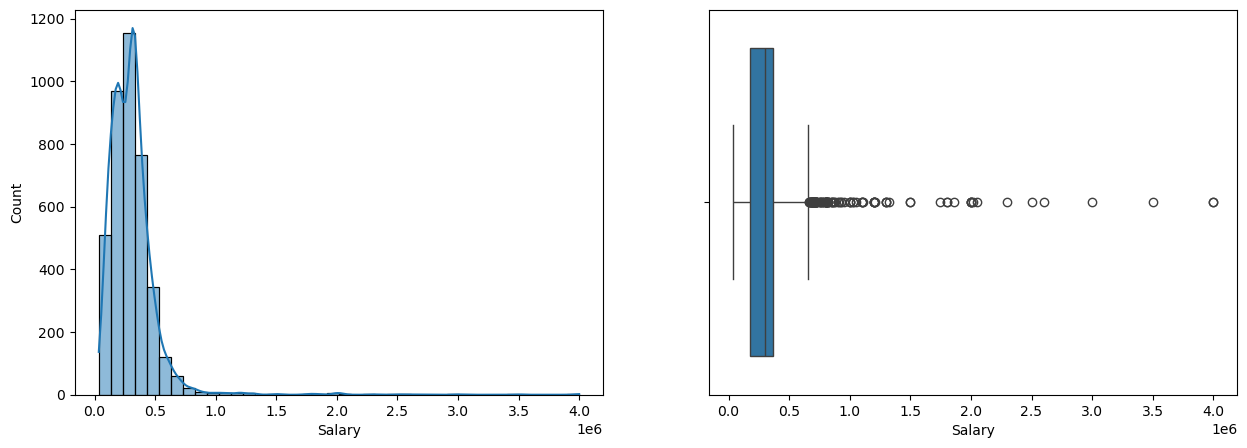

In [42]:
uni_num_viz_analysis(data[['Salary']])

In [43]:
data[data['Salary'] == data['Salary'].max()]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,tenth_percentage,tenth_board,twelfth_graduation_year,twelfth_percentage,twelfth_board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period
1237,48107,4000000.000,2010-07-01,2015-03-01,senior software engineer,new delhi,m,1987,90.830,rbse,2005,88.770,rbse,2857,1,B.Tech/B.E.,Computer Science/Engineering,72.600,2857,1,Rajasthan,1970,675,685,585,0.990,655,-1,-1,-1,-1,-1,-1,-0.726,0.033,-1.650,-0.878,-0.130,5
2182,41147,4000000.000,2010-01-01,2011-12-01,automation engineer,gurgaon,m,1987,53.000,up bord,2004,61.000,up bord,64,2,MCA,Computer Science/Engineering,65.000,64,0,Uttar Pradesh,1970,405,455,475,0.526,415,-1,-1,-1,-1,-1,-1,-3.354,-0.435,-1.070,-0.055,-2.657,1


- Insights
- Analyzing the Salary
  1. The Salary of the graduated ranges from 0 to 4 million.
  2. Most of the graduates having salary in between 0 to 5 lakhs
  3. Two graduates has secured the highest package i.e 4 million, their ID's are 48107 and 41147
  4. 50% of Engineering graduates in the dataset earn less than 3 lakh rupees
  5. There are several outliers above the upper whisker, indicating that some graduates earn significantly higher salaries than the rest. These
     salaries extend up to nearly 40 lakhs (4 million). This suggests that while most graduates have moderate salaries, a small number of
     graduates earn much higher salaries, likely due to specialized skills, job roles, or locations.
  6. The absence of outliers below the lower whisker shows that there are no extreme low salaries (less than 50,000) in the dataset.

In [45]:
## Change the scale of collegeGPA from 1 to 100 ==> 0 to 10, which is more appropriate.
data['collegeGPA'] = data['collegeGPA']/10

In [46]:
## Analyzing the collegeGPA
uni_num_analysis(data[['collegeGPA']])

-------------------- collegeGPA --------------------
count      3998.000
mean          7.149
std           0.817
min           0.645
max           9.993
skew         -1.249
kurtosis     10.234
Name: collegeGPA, dtype: float64
IQR of collegeGPA 0.9919999999999991
median of collegeGPA 7.172
Lower Limit collegeGPA 5.152750000000002
Upper Limit collegeGPA 9.120749999999997



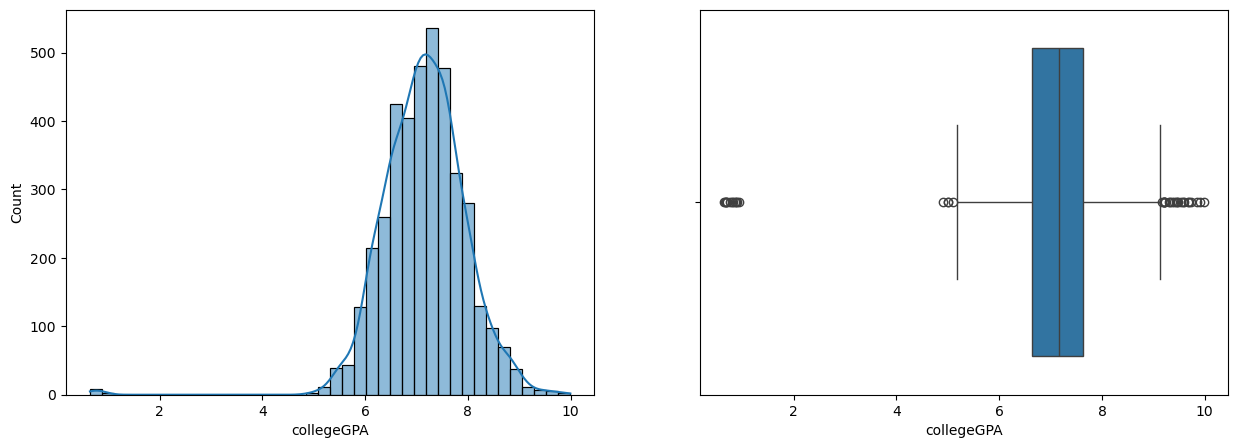

In [47]:
uni_num_viz_analysis(data[['collegeGPA']])

In [48]:
## Finding the graduate who scored max CGPA
data[data['collegeGPA'] == data['collegeGPA'].max()]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,tenth_percentage,tenth_board,twelfth_graduation_year,twelfth_percentage,twelfth_board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period
690,609356,440000.000,2013-10-01,2015-04-01,software developer,gurgaon,f,1989,83.160,icse,2007,77.000,cbse,10950,1,M.Tech./M.E.,Instrumentation/Control Engineering,9.993,10950,0,Punjab,1970,535,595,620,0.376,455,300,-1,-1,-1,313,-1,0.846,-0.620,-0.758,-0.995,-0.286,2


- Insights
- Observations
  1. Most of the graduates scores in between 6.0 to 8.0 CGPA indicating that the majority of students perform in the above-average range.
  2. There are few students scored less than 2.0 CGPA considered as low performers and indicating a potential struggle in academic performance.
  3. Maximum CGPA i.e(9.993) scored by ID of 609356 showing peak academic success and she should be the top 1% of the data.
  4. 50% of graduates scored more than 7.0 CGPA, this suggests that overall performance trends toward good to excellent grades.

In [50]:
## English
uni_num_analysis(data[['English']])

-------------------- English --------------------
count      3998.000
mean        501.649
std         104.940
min         180.000
max         875.000
skew          0.192
kurtosis     -0.254
Name: English, dtype: float64
IQR of English 145.0
median of English 500.0
Lower Limit English 207.5
Upper Limit English 787.5



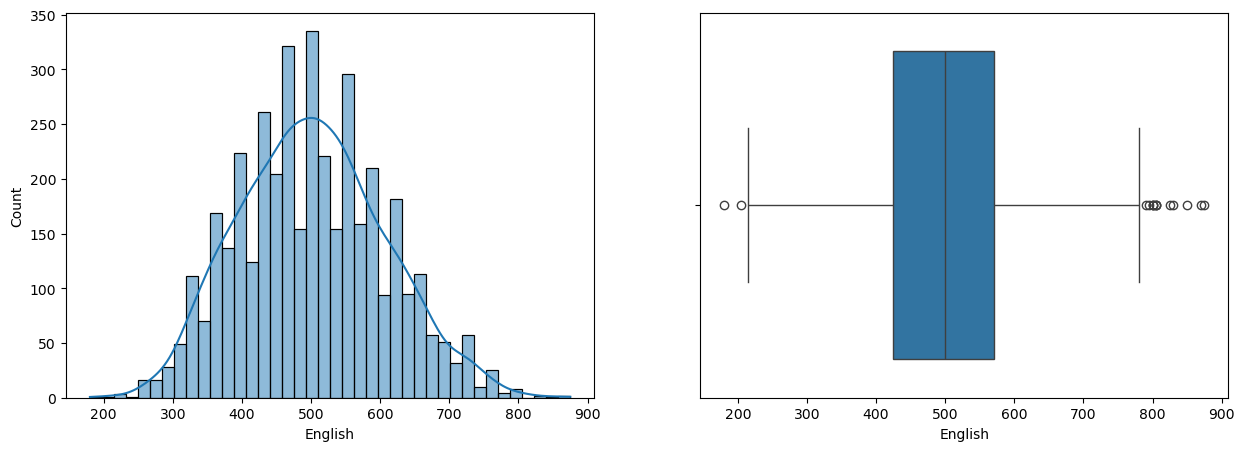

In [51]:
uni_num_viz_analysis(data[['English']])

In [52]:
data[data['English'] == data['English'].max()]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,tenth_percentage,tenth_board,twelfth_graduation_year,twelfth_percentage,twelfth_board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period
275,1023622,305000.000,2014-08-01,2024-10-04,software engineer,bangalore,m,1993,88.600,state board,2010,92.000,state board,14342,2,B.Tech/B.E.,Computer Science/Engineering,7.300,14342,0,Andhra Pradesh,1970,875,510,500,0.745,485,-1,438,-1,-1,-1,-1,-0.015,0.379,0.164,0.019,0.289,10


In [53]:
data[(data['English'] >= 400) & (data['English']<= 700)]['English'].count()

3152

- Insights
- Observations
  1. Half of the graduates were scored more than 500 marks in English.
  2. Two graduates scored below 210, considered as poor knowledge in English.
  3. Max score is 875 scored by ID of 1023622 from computer science & engineering branch.
  4. 78% of the graduates scored in between 400 to 700 marks.

In [55]:
## Logical
uni_num_analysis(data[['Logical']])

-------------------- Logical --------------------
count      3998.000
mean        501.599
std          86.783
min         195.000
max         795.000
skew         -0.217
kurtosis     -0.225
Name: Logical, dtype: float64
IQR of Logical 120.0
median of Logical 505.0
Lower Limit Logical 265.0
Upper Limit Logical 745.0



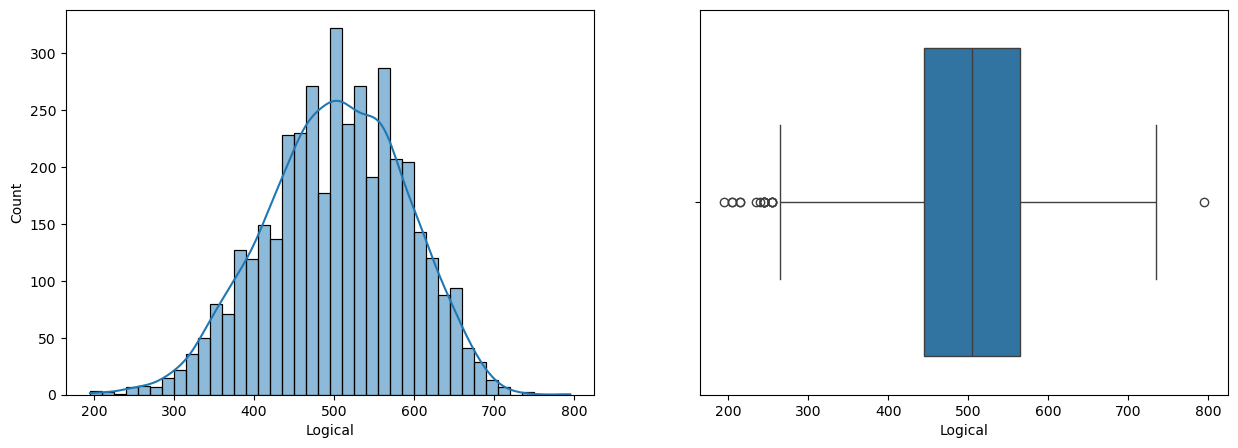

In [56]:
uni_num_viz_analysis(data[['Logical']])

In [57]:
data[data['Logical'] == data['Logical'].max()]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,tenth_percentage,tenth_board,twelfth_graduation_year,twelfth_percentage,twelfth_board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period
1014,649530,350000.000,2014-02-01,2024-10-04,systems engineer,pune,m,1991,80.530,state board,2008,80.500,state board,8743,2,B.Tech/B.E.,Computer Science/Engineering,5.861,8743,0,Maharashtra,1970,645,795,675,0.984,635,-1,-1,-1,-1,-1,-1,-0.446,1.378,0.932,-0.995,0.864,10


In [58]:
data[(data['Logical'] >= 400) & (data['Logical']<= 700)]['Logical'].count()

3479

- Insights
- Observations
  1. Half of the graduates were scored more than 500 marks in Logical.
  2. 
Two graduates scored below2650, considered as poor knowledge inLogicalh
  3. 
Max score is 875 scored by ID o64953022 froinformation technologyc
  4. 87
78% of the graduates scored in between 400 to 700 marks.

In [60]:
uni_num_analysis(data[['Quant', 'Domain']])

-------------------- Quant --------------------
count      3998.000
mean        513.378
std         122.302
min         120.000
max         900.000
skew         -0.019
kurtosis     -0.102
Name: Quant, dtype: float64
IQR of Quant 165.0
median of Quant 515.0
Lower Limit Quant 182.5
Upper Limit Quant 842.5

-------------------- Domain --------------------
count      3998.000
mean          0.510
std           0.469
min          -1.000
max           1.000
skew         -1.922
kurtosis      3.896
Name: Domain, dtype: float64
IQR of Domain 0.4999334224
median of Domain 0.6226429158
Lower Limit Domain -0.40758523369999994
Upper Limit Domain 1.5921484558999999



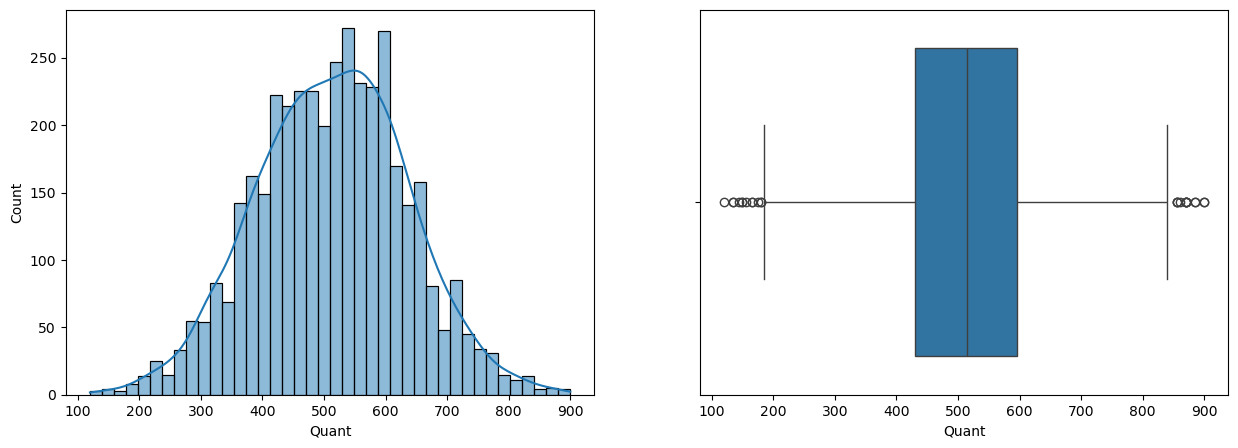

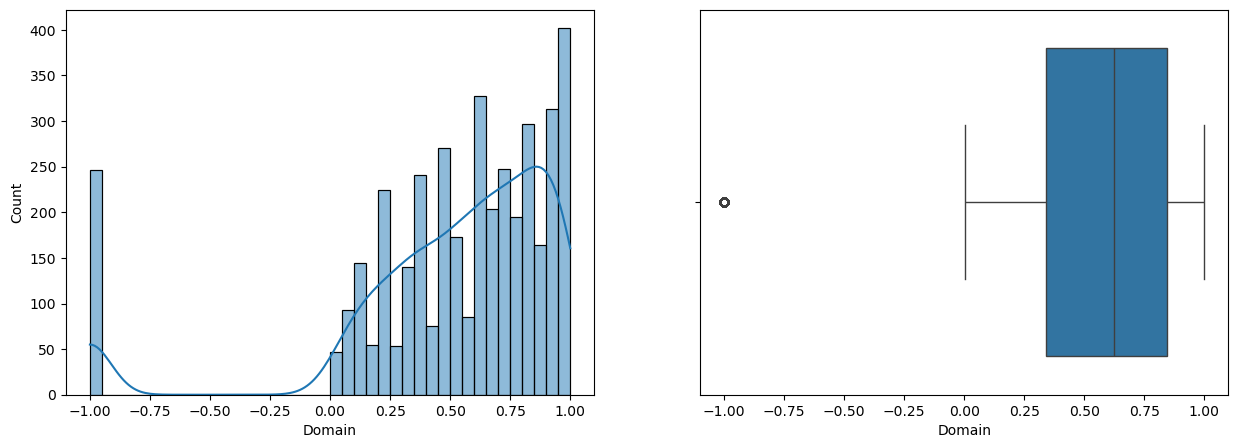

In [61]:
uni_num_viz_analysis(data[['Quant', 'Domain']])

- Insights
- Observations
- Quantitative
  1. Half of the graduates scored more than 515.
  2. Most of the graduates scored in between 300 to 700 marks.
  3. There are few students who scored less than 200 marks, considered as low performers in Quantitative.
  4. Few students scored more than 840 considered as top performers.
- Domain
  1. 50% of graduates performed above 0.62 without outliers in Domaian.
  2. -1 could be a placeholder value for students with incomplete data or missing evaluations in this particular domain.
  3. Above 400 graduates has scored 0.9 to 1.00 showing peak Domain success.

# Univariate Categorical Analysis

In [64]:
data['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'production engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assistant system engineer', 'a

In [65]:
data['Designation'].nunique()

417

In [66]:
data['Designation'].value_counts(ascending = False)[:10]

Designation
software engineer             539
systems engineer              323
software developer            265
programmer analyst            139
java software engineer        111
software test engineer        100
project engineer               77
technical support engineer     76
senior software engineer       72
java developer                 67
Name: count, dtype: int64

<Axes: ylabel='Designation'>

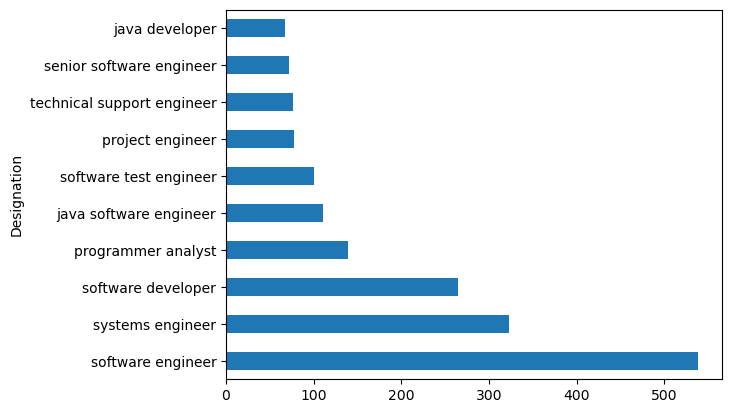

In [67]:
data['Designation'].value_counts(ascending = False)[:10].plot(kind = 'barh')

- Insights
- Observations
  1. These are the top 10 Designations
  2. **Software Engineer** Designation is leading with the count of above 500 among all job roles.

In [69]:
data['JobCity'].unique()

array(['bangalore', 'indore', 'chennai', 'gurgaon', 'manesar',
       'hyderabad', 'noida', 'kolkata', 'pune', 'mohali', 'jhansi',
       'new delhi', 'bhubaneswar', 'mumbai', 'mangalore', 'rewari',
       'gaziabaad', 'bhiwadi', 'mysore', 'rajkot', 'greater noida',
       'jaipur', 'thane', 'maharajganj', 'thiruvananthapuram',
       'punchkula', 'coimbatore', 'dhanbad', 'lucknow', 'trivandrum',
       'gandhi nagar', 'una', 'daman and diu', 'vsakhapttnam', 'nagpur',
       'bhagalpur', 'ahmedabad', 'kochi', 'bankura', 'kanpur',
       'vijayawada', 'beawar', 'alwar', 'siliguri', 'raipur', 'bhopal',
       'faridabad', 'jodhpur', 'udaipur', 'muzaffarpur', 'bulandshahar',
       'haridwar', 'raigarh', 'visakhapatnam', 'jabalpur', 'unnao',
       'aurangabad', 'belgaum', 'dehradun', 'rudrapur', 'jamshedpur',
       'dharamshala', 'hissar', 'ranchi', 'madurai', 'chandigarh',
       'australia', 'cheyyar', 'sonepat', 'ghaziabad', 'pantnagar',
       'jagdalpur', 'angul', 'baroda', 'ariyal

In [70]:
data['JobCity'].value_counts()[:10]

JobCity
bangalore    1148
noida         390
hyderabad     370
pune          328
chennai       313
new delhi     229
gurgaon       222
mumbai        153
kolkata       120
jaipur         53
Name: count, dtype: int64

<Axes: ylabel='JobCity'>

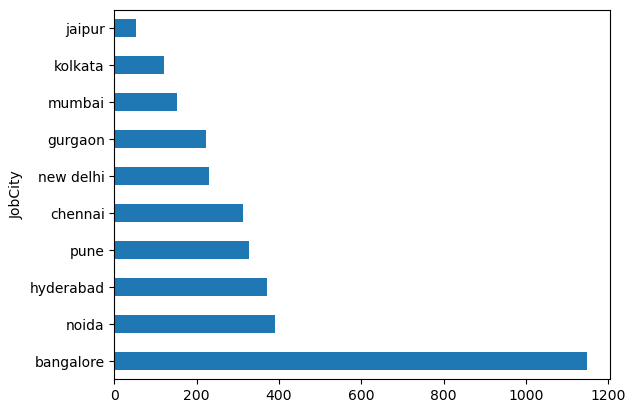

In [71]:
data['JobCity'].value_counts(ascending = False)[:10].plot(kind = 'barh')

- Insights
- Observations
  1. Above 686 graduates are employeed in Bangalore, then Noida and them Hyderabad.
  2. Noida and Hyderabad are in almost same place

In [73]:
data['Gender'].unique()

array(['f', 'm'], dtype=object)

In [74]:
data['Gender'].value_counts()

Gender
m    3041
f     957
Name: count, dtype: int64

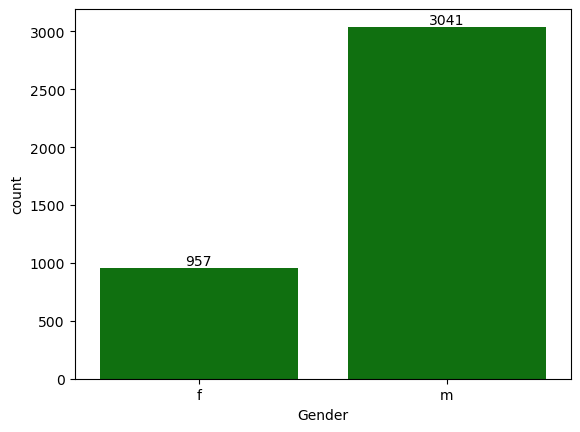

In [75]:
ax = sns.countplot(x = data['Gender'], color = 'green')
for containers in ax.containers:
    ax.bar_label(containers)
plt.show()

- Observations
  1. Male graduates are higher than female graduates

In [77]:
data['CollegeTier'].unique()

array([2, 1], dtype=int64)

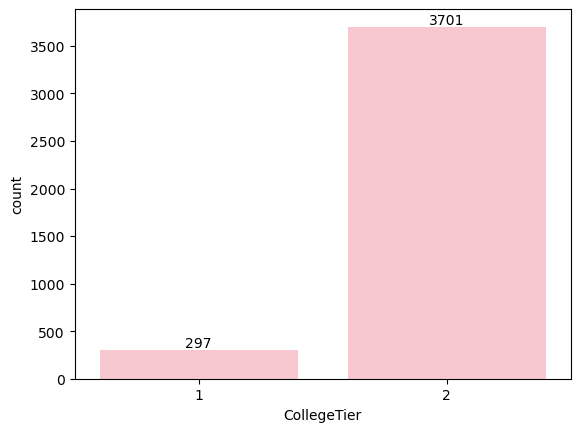

In [78]:
ax = sns.countplot(x = data['CollegeTier'], color = 'pink')
for containers in ax.containers:
    ax.bar_label(containers)
plt.show()

- Observations
  1. Most of the graduates form Tier 2 college

In [80]:
data['Degree'].unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

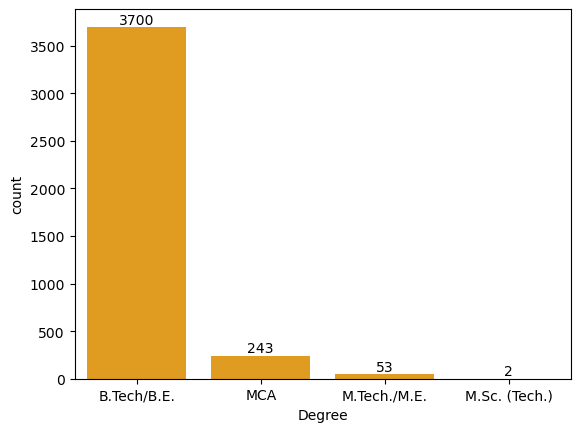

In [81]:
ax = sns.countplot(x = data['Degree'], color = 'orange')
for containers in ax.containers:
    ax.bar_label(containers)
plt.show()

- Observations
  1. 92% i.e(3700) of the graduates form **B.Tech/B.E**
  2. **MCA** graduates are 243 and then **M.Tech/M.E** are with 53 graduates and **M.Sc. (Tech.)** with 2 graduates

In [83]:
data['Specialization'].unique()

array(['Computer Science/Engineering', 'Electronics/Telecommunication',
       'Mechanical Engineering', 'Instrumentation/Control Engineering',
       'Electrical Engineering', 'Information Science/Technology',
       'Civil Engineering', 'Materials/Metallurgical Engineering',
       'Chemical Engineering', 'aeronautical engineering', 'Other',
       'Biotechnology', 'Embedded Systems', 'Mechatronics',
       'Automotive Engineering', 'Polymer Technology', 'Power Systems',
       'Industrial Engineering', 'electronics'], dtype=object)

In [84]:
data['Specialization'].nunique()

19

In [85]:
data['Specialization'].value_counts()[:10]

Specialization
Computer Science/Engineering           2258
Electronics/Telecommunication          1225
Mechanical Engineering                  218
Instrumentation/Control Engineering      93
Electrical Engineering                   84
Information Science/Technology           30
Civil Engineering                        29
Biotechnology                            17
Other                                    13
Chemical Engineering                      9
Name: count, dtype: int64

<Axes: ylabel='Specialization'>

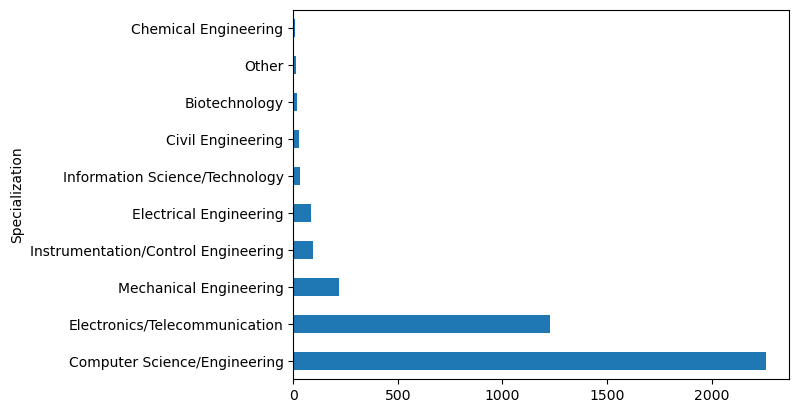

In [86]:
data['Specialization'].value_counts()[:10].plot(kind = 'barh')

- Observations
  1. computer science & engineering is in 1st place with graduates of 2258
  2. 
1225 Graduates are from electronics and communication engineering in 2nd place and follows…..

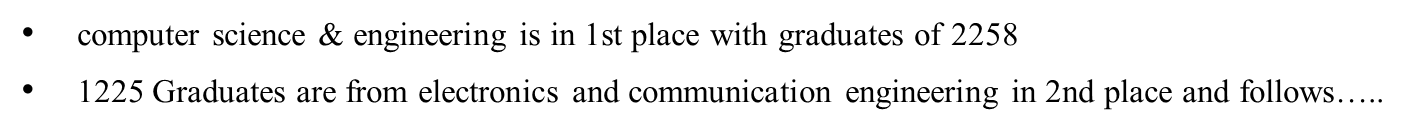
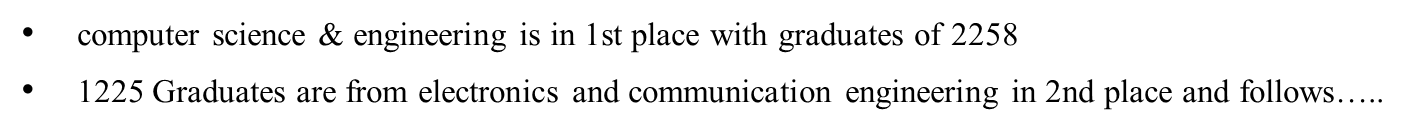
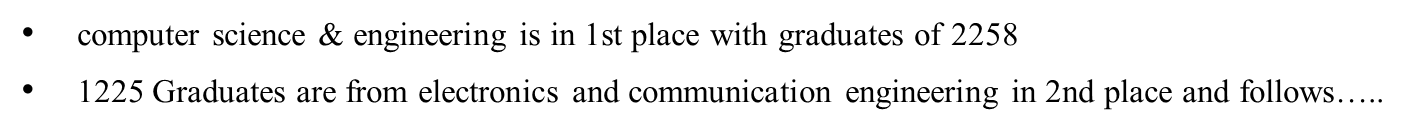
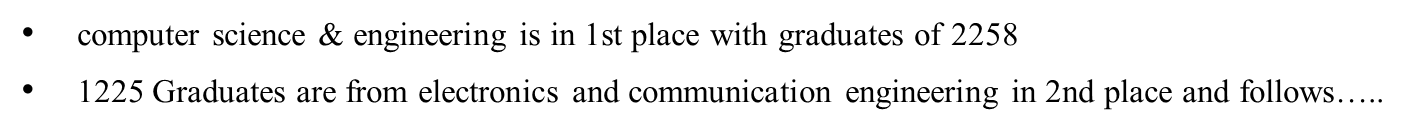

In [88]:
data['CollegeState'].unique()

array(['Andhra Pradesh', 'Madhya Pradesh', 'Uttar Pradesh', 'Delhi',
       'Karnataka', 'Tamil Nadu', 'West Bengal', 'Maharashtra', 'Haryana',
       'Telangana', 'Orissa', 'Punjab', 'Kerala', 'Gujarat', 'Rajasthan',
       'Chhattisgarh', 'Uttarakhand', 'Jammu and Kashmir', 'Jharkhand',
       'Himachal Pradesh', 'Bihar', 'Assam', 'Goa', 'Sikkim',
       'Union Territory', 'Meghalaya'], dtype=object)

In [89]:
data['CollegeState'].nunique()

26

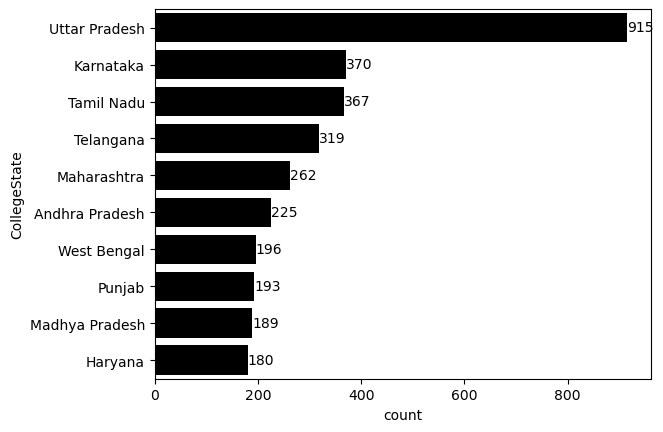

In [90]:
ax = sns.barplot(data['CollegeState'].value_counts()[:10], color = 'black', orient='h')
for containers in ax.containers:
    ax.bar_label(containers)
plt.show()

- Observations
  1. Most of the Graduates i.e 915 form Uttar Pradesh then Karnataka with 370 and then Tamil Nadu with 367 and follows...

# Bivariate / Multivariate Analysis

## Numerical vs Numerical

### Target variable is Salary

In [95]:
## Find the Correlation between salary and collegeGPA
data['Salary'].corr(data['collegeGPA'], method = 'pearson')

0.13010251907112558

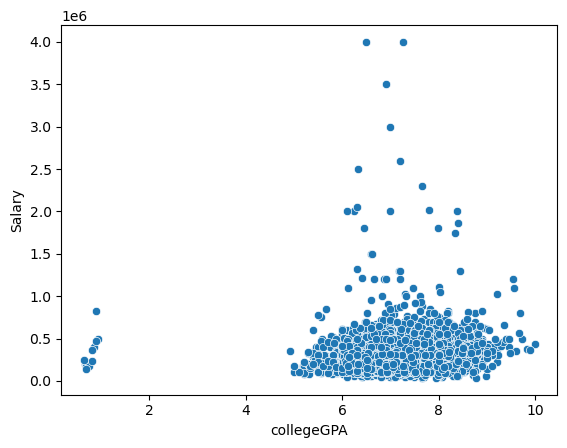

In [96]:
## plot scatter plot
sns.scatterplot(x = 'collegeGPA', y = 'Salary', data = data)
plt.show()

<Axes: >

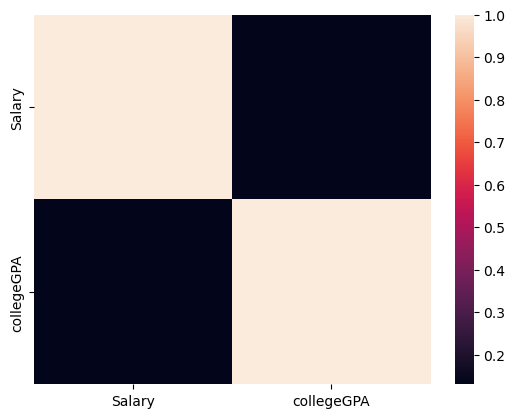

In [97]:
sns.heatmap(data[['Salary', 'collegeGPA']].corr())

- Insights
- Observations
  1. There is a weak correlation between College GPA and salary, indicating that higher GPA does not guarantee a higher salary.
  2. Graduates with top GPA (i.e., 9.993) received moderate packages like 4,40,000.
  3. Mid-range GPAs (i.e., 7.2 and 6.5) secured much higher packages of up to 4 million, showing GPA is not the only deciding factor.
  4. The majority of graduates are placed with packages ranging from 35,000 to 1 million.
  5. These insights suggest that factors beyond academic performance, such as skills and demand, significantly influence salary.

In [99]:
## Salary vs English, Logical, Quant, Domain
columns = ['English', 'Logical', 'Quant', 'Domain']
for col in columns:
    print(f"Salary vs {col} : {data['Salary'].corr(data[col], method = 'pearson')}")

Salary vs English : 0.178219044975371
Salary vs Logical : 0.17927496648308647
Salary vs Quant : 0.23062742818671125
Salary vs Domain : 0.10465553709876832


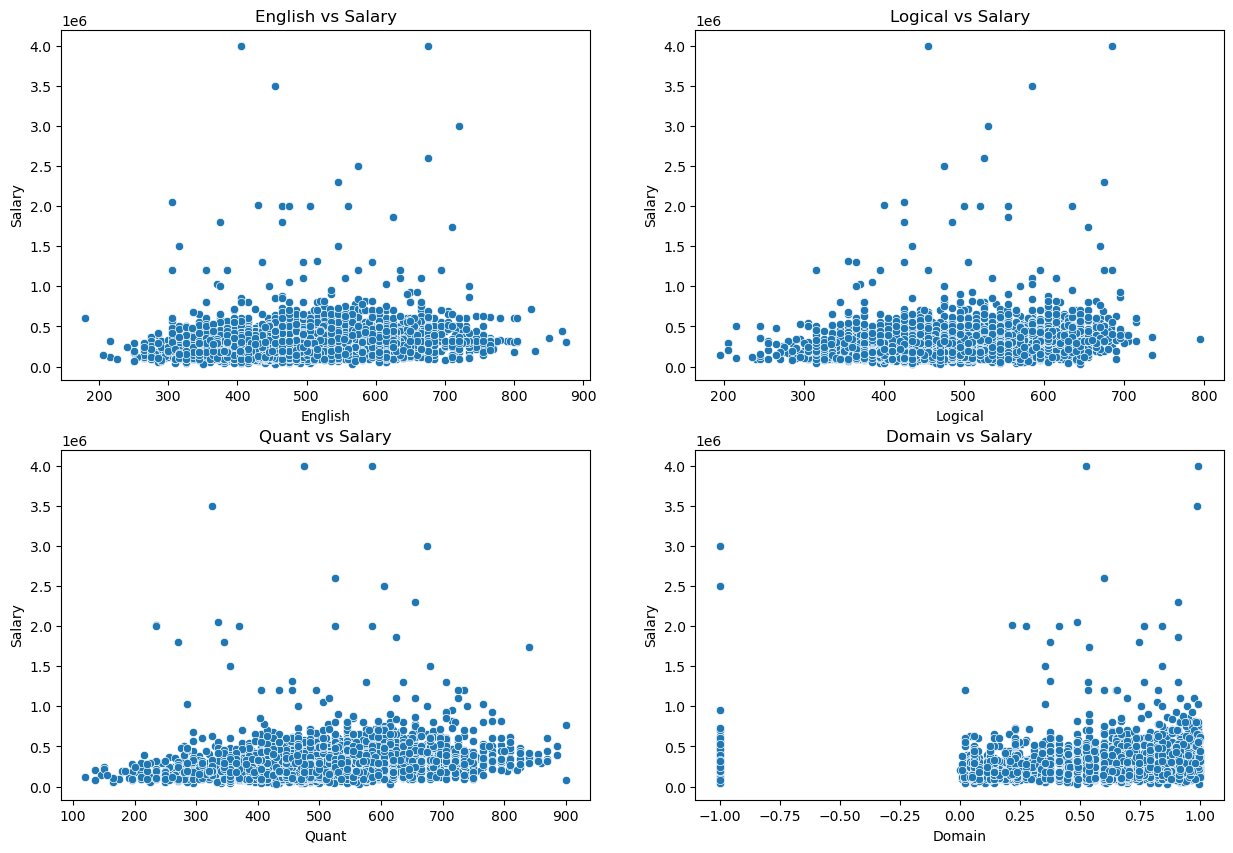

In [100]:
## Plot scatter plot for Salary vs English, Logical, Quant, Domain
columns = ['English', 'Logical', 'Quant', 'Domain']
plt.figure(figsize = (15, 10))
for i, col in enumerate(columns, start = 1):
    plt.subplot(2,2,i)
    sns.scatterplot(x = col, y = 'Salary', data = data)
    plt.title(f'{col} vs Salary')
plt.show()

In [101]:
data[data['Domain'] >= 0]['Salary'].min()

35000.0

In [102]:
data[data['Domain'] < 0]['Salary'].min()

40000.0

- Insights
- Observations
  1. Here also there is a weak correlation between Salary and test scores.
  2. Test scores were not get impacted on Salaries.
  3. In Domain -1 might be indicates missing data of graduates(246) and also they secured good score in other tests and got placed with minimum
     package of 40,000 and max with 30,00,000.

In [104]:
columns = ['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',	
'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

for column in columns:
        print(f"Salary vs {column} : {data['Salary'].corr(data[col], method = 'pearson')}")

Salary vs ComputerProgramming : 0.10465553709876832
Salary vs ElectronicsAndSemicon : 0.10465553709876832
Salary vs ComputerScience : 0.10465553709876832
Salary vs MechanicalEngg : 0.10465553709876832
Salary vs ElectricalEngg : 0.10465553709876832
Salary vs TelecomEngg : 0.10465553709876832
Salary vs CivilEngg : 0.10465553709876832
Salary vs conscientiousness : 0.10465553709876832
Salary vs agreeableness : 0.10465553709876832
Salary vs extraversion : 0.10465553709876832
Salary vs nueroticism : 0.10465553709876832
Salary vs openess_to_experience : 0.10465553709876832


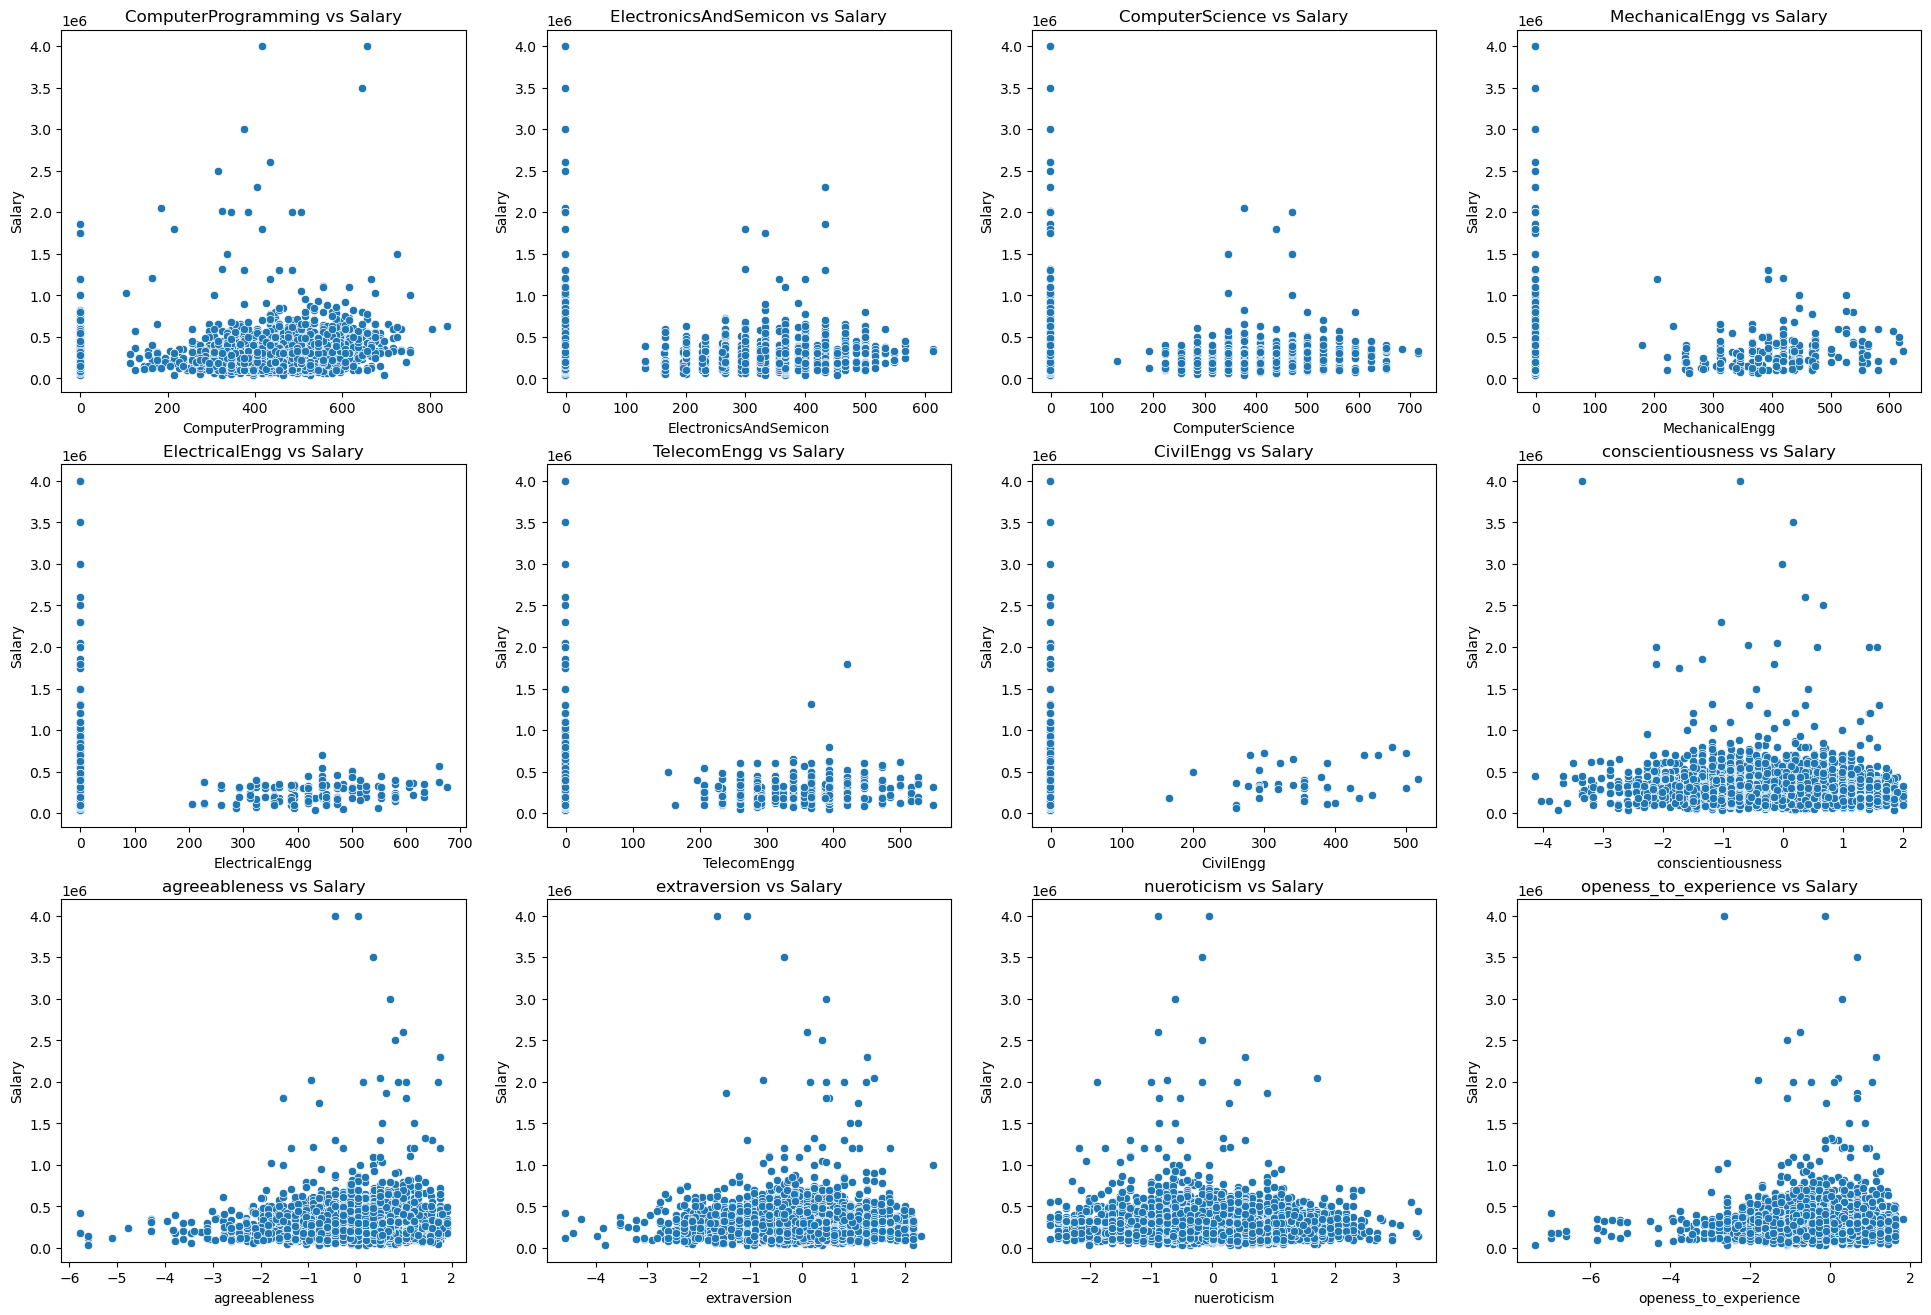

In [105]:
plt.figure(figsize = (24, 16))
for i, column in enumerate(columns, start = 1):
    plt.subplot(3,4,i)
    sns.scatterplot(x = data[column], y = 'Salary', data = data)
    plt.title(f'{column} vs Salary')
plt.show()

- Observations
  1. These tests also not impacting on Salary
  2. There is a weak correlation between 'Salary' and other features like 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',      'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'.
  3. Similarly, personality traits such as 'conscientiousness', 'agreeableness', 'extraversion', 'neuroticism', and 'openness_to_experience' show weak  or no direct correlation with salary.
  4. It appears that salary is more dependent on the practical skills graduates possess rather than their test scores or academic GPA.

### Numerical(Target Variable ==> Salary) vs Categorical

In [108]:
top_salaries = data.groupby(['Designation', 'Gender'])['Salary'].max().reset_index()

top_salaries = top_salaries.sort_values(by='Salary', ascending=False).head(20)


In [109]:
top_salaries

,Designation,Gender,Salary
451,senior software engineer,m,4000000.000
56,automation engineer,m,4000000.000
34,assistant system engineer,f,3500000.000
341,programmer,m,3000000.000
14,application developer,m,2600000.000
495,software test engineer,m,2500000.000
475,software developer,m,2300000.000
485,software engineer trainee,m,2050000.000
303,operations analyst,m,2020000.000
237,it technician,m,2000000.000


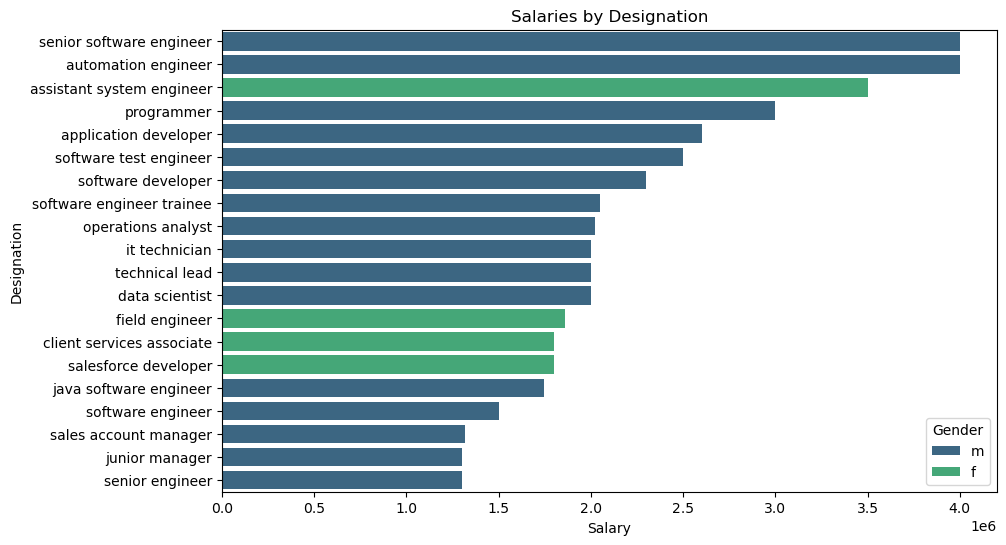

In [110]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Salary', y='Designation', hue = 'Gender', data=top_salaries, palette='viridis')
plt.title('Salaries by Designation')
plt.show()

- Observations
  1. These are the top 20 highest salaries.
  2. Males(i.e., 16) are higher than females(i.e., 4) in top 20 high paying salaries. 
  3. **senior software engineer** and **automation engineer** has highest salary (i.e., 4 million) cracked by males.
  4. **Assistant system enginneer** has second highest salary i.e., 3.5 million cracked by female
  5. **software engineer trainee**, **operations analyst** and **technical lead** having the almost salaries(i.e, 2 million).


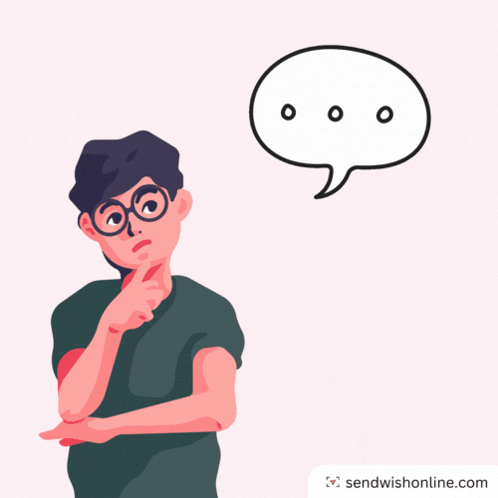

In [112]:
### Now lets us see the high paying designations and their relation with respect to gender
highpay_list = list(data.sort_values("Salary",ascending=False)["Designation"].unique())[:20]
high_Salaries = data[data['Designation'].isin(highpay_list)]
high_Salaries.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,tenth_percentage,tenth_board,twelfth_graduation_year,twelfth_percentage,twelfth_board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period
3,267447,1100000.000,2011-07-01,2024-10-04,senior software engineer,gurgaon,m,1989,85.600,cbse,2007,83.600,cbse,6920,1,B.Tech/B.E.,Computer Science/Engineering,7.464,6920,1,Delhi,1970,635,585,625,0.974,615,-1,-1,-1,-1,-1,-1,0.046,0.345,-0.344,-0.408,-0.919,13
6,947847,300000.000,2014-08-01,2015-05-01,java software engineer,bangalore,m,1993,86.080,state board,2010,67.500,state board,314,2,B.Tech/B.E.,Computer Science/Engineering,7.298,314,1,Karnataka,1970,590,435,380,0.357,405,-1,346,-1,-1,-1,-1,1.708,-0.105,-1.038,-2.009,-1.087,1
14,1279958,300000.000,2013-07-01,2024-10-04,java software engineer,bangalore,m,1992,81.200,state board,2008,79.900,state board,64,2,B.Tech/B.E.,Instrumentation/Control Engineering,6.767,64,0,Uttar Pradesh,1970,395,565,645,-1.000,495,-1,376,-1,-1,-1,-1,0.703,0.712,0.010,-0.995,0.672,11
19,466888,325000.000,2014-09-01,2024-10-04,software engineer,pune,f,1990,79.000,cbse,2008,62.200,cbse,7977,2,B.Tech/B.E.,Computer Science/Engineering,7.630,7977,0,Uttar Pradesh,1970,485,445,435,0.865,525,-1,-1,-1,-1,-1,-1,0.819,0.267,-0.271,-0.408,-0.130,10
20,140069,320000.000,2010-11-01,2012-09-01,software engineer,bangalore,f,1988,91.200,karnataka secondary school of examination,2006,84.630,karnataka pre university board,4437,2,B.Tech/B.E.,Computer Science/Engineering,7.815,4437,0,Karnataka,1970,455,535,445,0.636,445,-1,-1,-1,-1,-1,-1,-0.108,0.969,0.527,-0.290,0.344,2


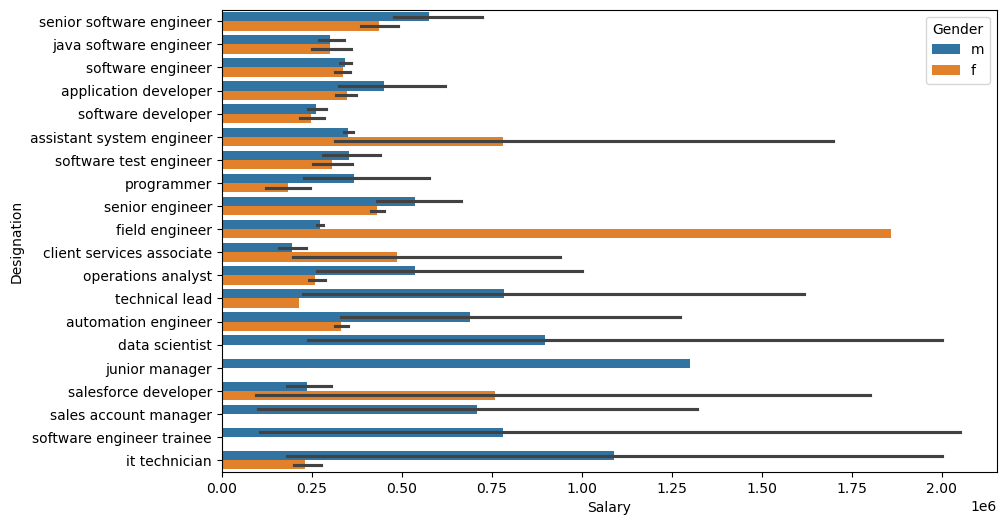

In [113]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Salary',y='Designation',hue='Gender',data=high_Salaries)
plt.show()

- Insights
- Observations
  1. A significant portion of the highest-paying jobs are within the IT domain
  2. In 45% of the top-paying roles, men are generally compensated more than women
  3. Conversely, in 20% of the top-paying roles, women earn higher salaries compared to men
  4. Certain positions, such as Junior Manager, Sales Account Manager, and Software Engineer Trainee, have no female representation
  5. Among men, the role of Junior Manager offers the highest salary, while for women, the highest-paying role is that of Field Engineer
  6. The gender pay disparity may be influenced by other factors such as experience and specialization
  7. Software Engineer and Software Developer roles are the most common and also rank among the highest-paying positions.

In [115]:
## Salary vs Gender
data.groupby(["Gender"]).agg({'Salary': ['count','mean', 'median', 'min', 'max']})

Salary                                            
        count       mean     median       min         max
Gender                                                   
f         957 294937.304 300000.000 35000.000 3500000.000
m        3041 311716.212 300000.000 35000.000 4000000.000

<Axes: xlabel='Gender', ylabel='Salary'>

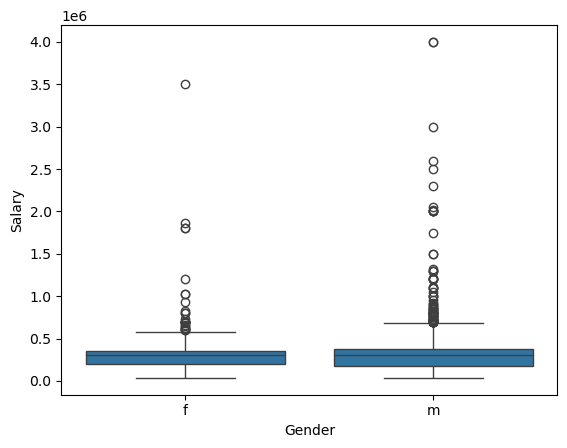

In [116]:
sns.boxplot(x = 'Gender', y = 'Salary', data = data)

- Obsevations
  1. Class imbalance between male and female, males are higher(i.e.,3041) than females(i.e.,957)
  2. Minimum and median salaries are same for males and females.
  3. Mean salary high for males because of count of males is high.
  4. In males highest salary is 4 million and in females is 3.5 million (considering outliers)

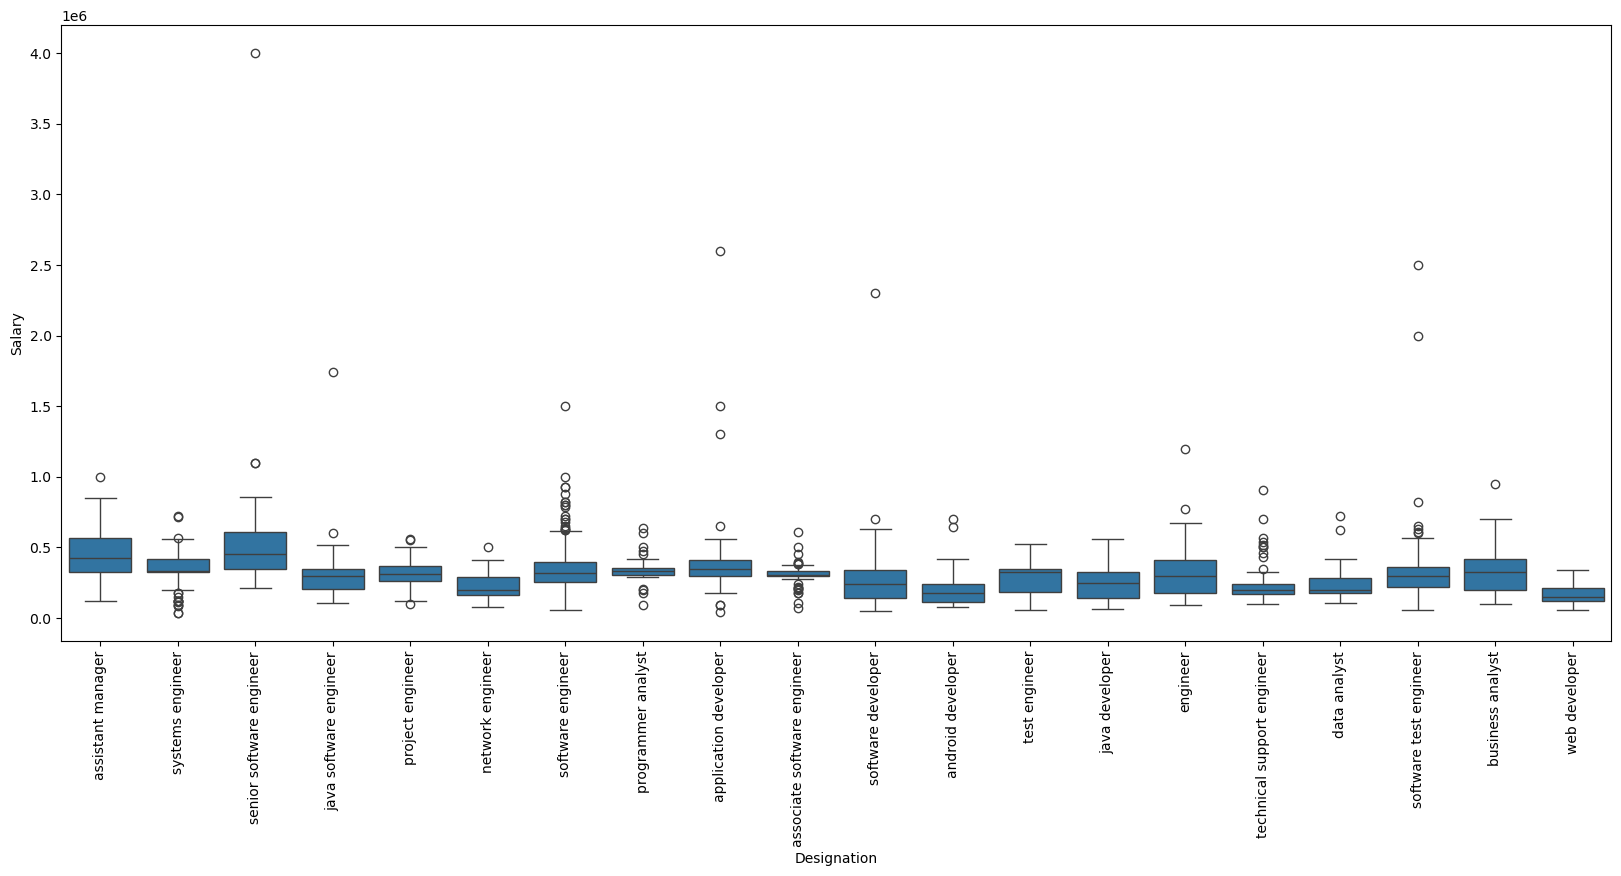

In [118]:
# Get the top 10 most frequent designations
top_10_designations = data['Designation'].value_counts(ascending=False).index[:20]

# Filter the data for only those top 10 designations
filtered_data = data[data['Designation'].isin(top_10_designations)]

# Plot the boxplot for top 10 designations
plt.figure(figsize=(20, 8))  # Increase figure size for clarity
sns.boxplot(x='Designation', y='Salary', data=filtered_data)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


- Observations
  1. There is a clear salary progression across designations, with Senior Software Engineers earning the highest median salaries and Technical Support Engineers and Software Test Engineers earning lower median salaries.
  2. Some designations, such as Senior Software Engineer and Systems Engineer, have high-end outliers where individuals are earning significantly more than their peers. These outliers could represent employees with exceptional skills, longer tenure, or positions in high-paying companies.
  3. Senior roles, especially Senior Software Engineers and Software Engineers, exhibit more variability in salary. This indicates that within these designations, there is a broad range of pay, likely due to differences in individual experience, company size, or location.
  4. On the other hand, junior roles like Technical Support Engineer, Software Test Engineer, and Programmer Analyst have relatively smaller interquartile ranges and fewer extreme outliers. This suggests more consistency in salary levels for these positions.

- Overall Insights of Designation vs Salary
  1. Seniority and job complexity significantly influence salary levels, with more experienced and higher-responsibility roles showing both higher pay and greater variability.
  2. Outliers, especially on the higher end, suggest that compensation for top performers or specialized skills can significantly skew the average salary.
  3. Standardization in salary is more common in mid- to lower-level roles, where pay is more predictable and less influenced by individual negotiation or exceptional qualifications.

In [121]:
## Salary vs CollegeTier
data.groupby(["CollegeTier"]).agg({'Salary': ['count','mean', 'median', 'min', 'max']})

Salary                                             
             count       mean     median        min         max
CollegeTier                                                    
1              297 442356.902 360000.000 100000.000 4000000.000
2             3701 296893.812 300000.000  35000.000 4000000.000

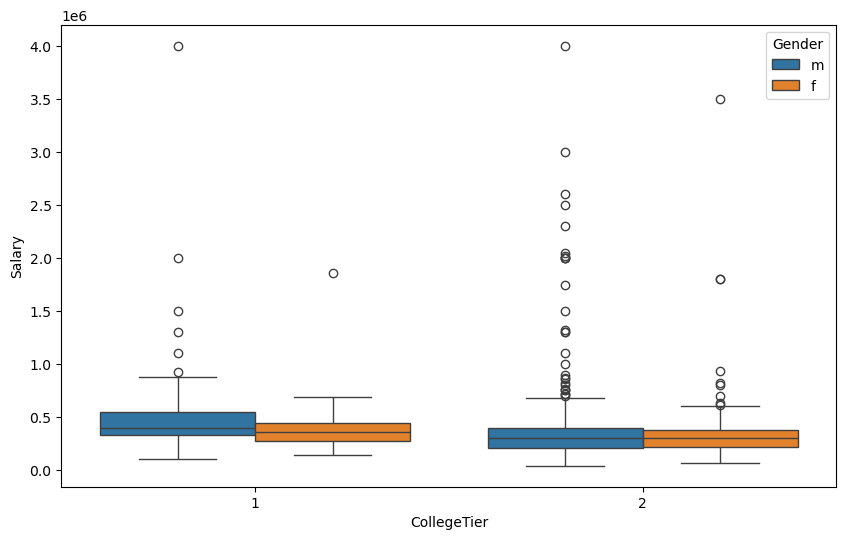

In [122]:
plt.figure(figsize = (10, 6))
sns.boxplot(x='CollegeTier', y='Salary', hue = 'Gender', data=high_Salaries)
plt.show()


In [123]:
high_Salaries.groupby('CollegeTier').Gender.value_counts()

CollegeTier  Gender
1            m          85
             f          17
2            m         897
             f         287
Name: count, dtype: int64

- Observations
  1. From the above bar graph,we can see that students from tier1 colleges have higher salary.
  2. 
We can see more men are from tier1 colleges than women and overally most students are from tier2 colleges
  3. 
This might be a reason for women being paid less than men in high paying jobs because as most of women are from tier-2 colleges


In [125]:
data.groupby(["Degree", "Gender"]).agg({'Salary': ['count','mean', 'median', 'min', 'max']})

Salary                                             
                      count       mean     median        min         max
Degree        Gender                                                    
B.Tech/B.E.   f         889 294713.161 300000.000  35000.000 3500000.000
              m        2811 313021.700 300000.000  35000.000 4000000.000
M.Sc. (Tech.) f           1 180000.000 180000.000 180000.000  180000.000
              m           1 460000.000 460000.000 460000.000  460000.000
M.Tech./M.E.  f           9 511666.667 400000.000  65000.000 1860000.000
              m          44 336363.636 330000.000  40000.000 1200000.000
MCA           f          58 266724.138 220000.000  60000.000 1200000.000
              m         185 285216.216 220000.000  50000.000 4000000.000

<Axes: xlabel='Degree', ylabel='Salary'>

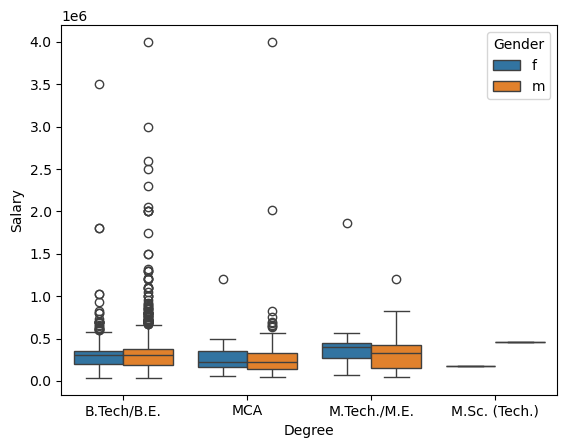

In [126]:
sns.boxplot(x='Degree', y='Salary', hue = 'Gender', data=data)

- Obervations
  1. Most of the Graduated are form B.Tech/B.E
  2. The average salary of males and females are same in B.Tech/B.E and MCA, males has high avg salary in M.Tech/M.E
  3. In Every Degree males are higher than females, Except M.Sc.

In [128]:
data.groupby(["Specialization"]).agg({'Salary': ['count','mean', 'median', 'min', 'max']})

Salary                                   \
                                     count       mean     median        min   
Specialization                                                                
Automotive Engineering                   5 222000.000 130000.000 100000.000   
Biotechnology                           17 258529.412 235000.000 100000.000   
Chemical Engineering                     9 370000.000 375000.000 100000.000   
Civil Engineering                       29 381206.897 320000.000 110000.000   
Computer Science/Engineering          2258 312504.429 300000.000  35000.000   
Electrical Engineering                  84 291785.714 282500.000  40000.000   
Electronics/Telecommunication         1225 294673.469 300000.000  45000.000   
Embedded Systems                         1 200000.000 200000.000 200000.000   
Industrial Engineering                   3 353333.333 350000.000 320000.000   
Information Science/Technology          30 289833.333 302500.000 100000.000   
Instrumentation/Control Engineering     93 352526.882 300000.000  50000.000   
Materials/Metallurgical Engineering      3 336666.667 335000.000 300000.000   
Mechanical Engineering                 218 319536.697 287500.000  60000.000   
Mechatronics                             4 253750.000 282500.000 100000.000   
Other                                   13 266538.462 240000.000 110000.000   
Polymer Technology                       1 700000.000 700000.000 700000.000   
Power Systems                            1 100000.000 100000.000 100000.000   
aeronautical engineering                 3 148333.333 145000.000 120000.000   
electronics                              1  40000.000  40000.000  40000.000   

                                                 
                                            max  
Specialization                                   
Automotive Engineering               400000.000  
Biotechnology                        450000.000  
Chemical Engineering                 730000.000  
Civil Engineering                    800000.000  
Computer Science/Engineering        4000000.000  
Electrical Engineering              1860000.000  
Electronics/Telecommunication       3000000.000  
Embedded Systems                     200000.000  
Industrial Engineering               390000.000  
Information Science/Technology       570000.000  
Instrumentation/Control Engineering 2300000.000  
Materials/Metallurgical Engineering  375000.000  
Mechanical Engineering              1300000.000  
Mechatronics                         350000.000  
Other                                600000.000  
Polymer Technology                   700000.000  
Power Systems                        100000.000  
aeronautical engineering             180000.000  
electronics                           40000.000

<Axes: xlabel='Salary', ylabel='Specialization'>

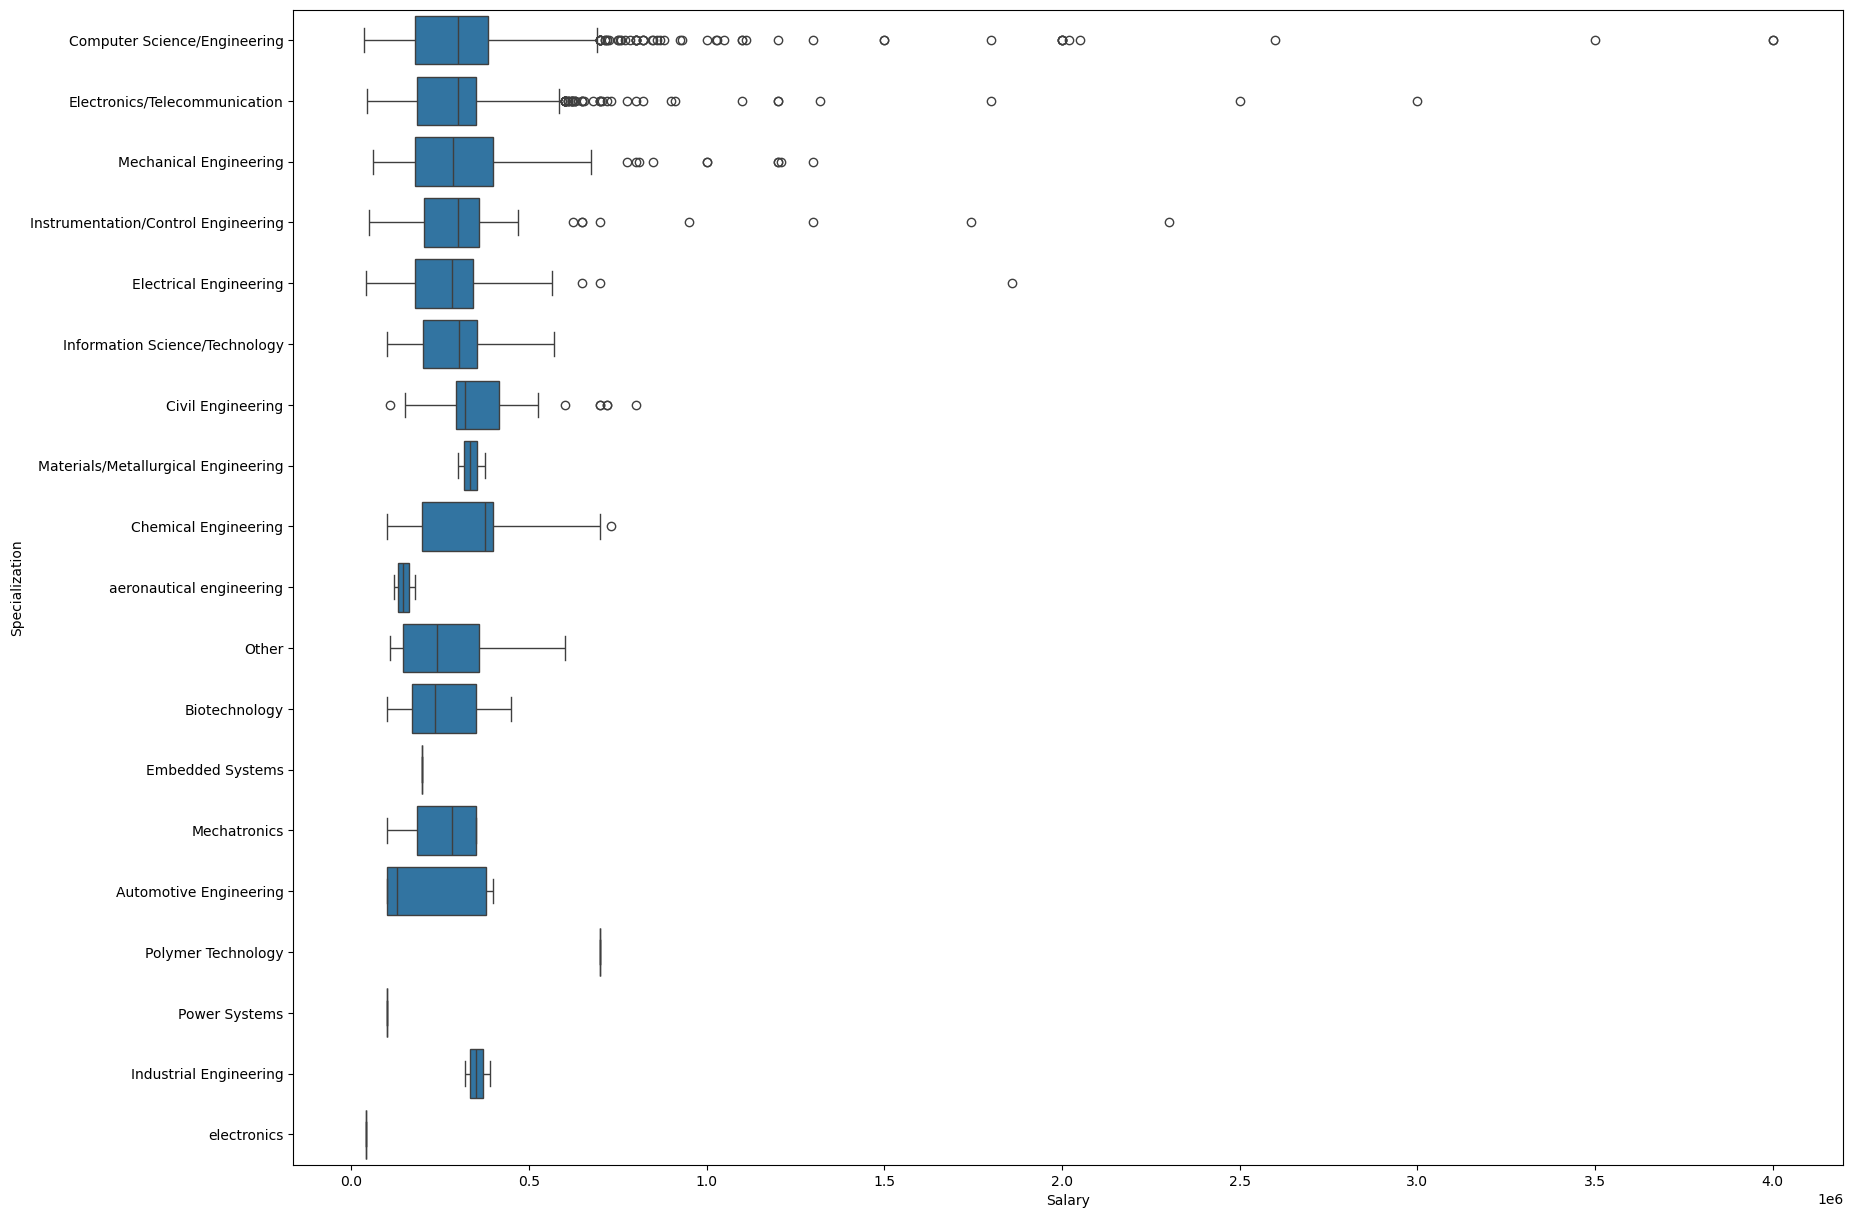

In [129]:
plt.figure(figsize = (20, 15))
sns.boxplot(x='Salary', y='Specialization', data=data)

<Axes: xlabel='Salary', ylabel='Specialization'>

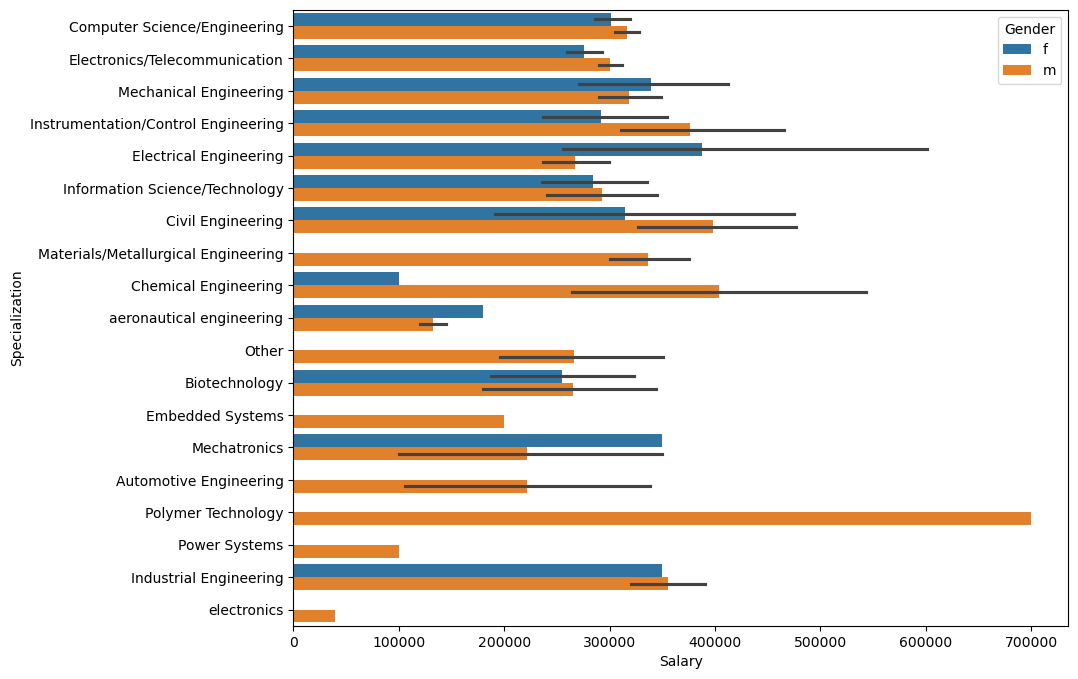

In [130]:
## For total Dataset
plt.figure(figsize = (10, 8))
sns.barplot(x='Salary', y='Specialization', hue = 'Gender', data=data)

- Observation for whole dataset
  1. In some specializations like Information Science/Technology, it seems both genders are more equally represented.
  2. In fields like Mechanical Engineering and Civil Engineering, male graduates seem to be more dominant, as indicated by the longer orange bars compared to blue.
  3. In specializations such as Computer Science/Engineering, Information Technology, Bio Technology and Industrial Engineering the blue and orange bars are more balanced, indicating more gender balance in these fields.

<Axes: xlabel='Salary', ylabel='Specialization'>

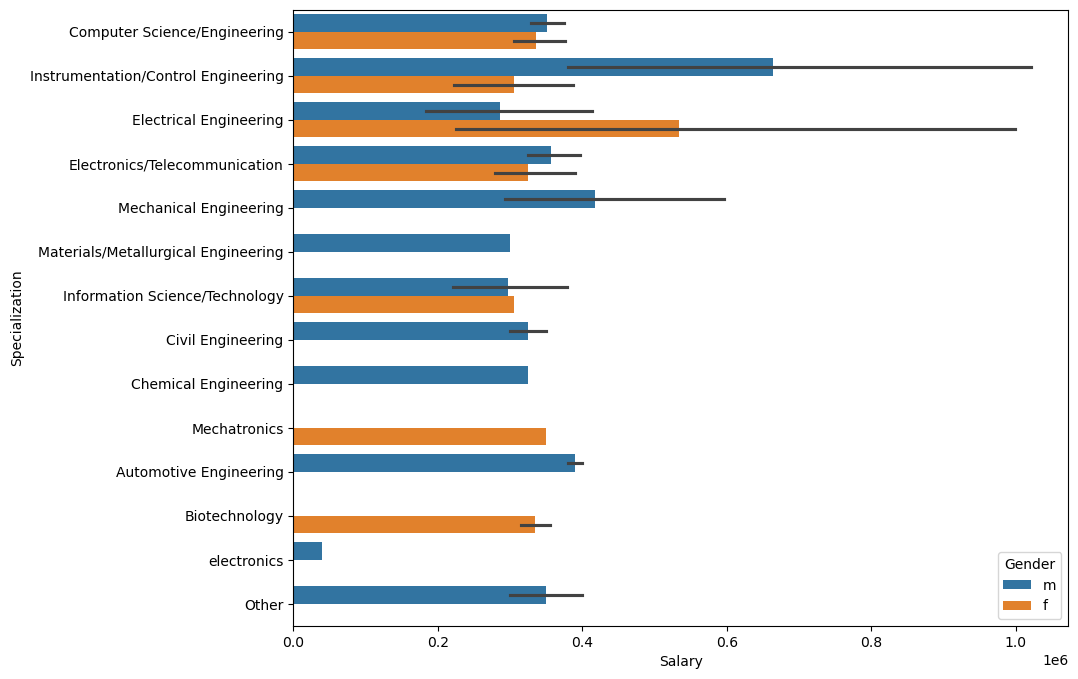

In [132]:
## for high_Salaries
plt.figure(figsize = (10, 8))
sns.barplot(x='Salary', y='Specialization', hue = 'Gender', data=high_Salaries)

- Observations for high paying salaries
  1. Mostly Male salaries are higher than females.
  2. In some specializations there are no females like Mechanical Engineering, chemical Engineering, Automative Engineering.
  3. In Electric Engineering Female salaries are more than males.

In [134]:
data.groupby(["CollegeState"]).agg({'Salary': ['count','mean', 'median', 'min', 'max']})

Salary                                             
                   count       mean     median        min         max
CollegeState                                                         
Andhra Pradesh       225 324488.889 305000.000  50000.000 3000000.000
Assam                  5 452000.000 360000.000 300000.000  800000.000
Bihar                 10 287000.000 185000.000 120000.000  610000.000
Chhattisgarh          27 261666.667 240000.000  95000.000  550000.000
Delhi                162 363179.012 330000.000  70000.000 1200000.000
Goa                    1 450000.000 450000.000 450000.000  450000.000
Gujarat               24 321666.667 227500.000  80000.000 1200000.000
Haryana              180 299916.667 277500.000  90000.000  950000.000
Himachal Pradesh      16 320312.500 307500.000 110000.000  570000.000
Jammu and Kashmir      7 396428.571 420000.000 260000.000  495000.000
Jharkhand             28 479285.714 442500.000  90000.000 1000000.000
Karnataka            370 324310.811 315000.000  40000.000 1100000.000
Kerala                33 278030.303 320000.000  65000.000  560000.000
Madhya Pradesh       189 331137.566 310000.000  55000.000 2020000.000
Maharashtra          262 301545.802 300000.000  50000.000 3500000.000
Meghalaya              2 537500.000 537500.000 175000.000  900000.000
Orissa               172 310203.488 317500.000  60000.000 1745000.000
Punjab               193 304663.212 300000.000  35000.000 1800000.000
Rajasthan            174 319626.437 280000.000  95000.000 4000000.000
Sikkim                 3 360000.000 345000.000 215000.000  520000.000
Tamil Nadu           367 280694.823 240000.000  40000.000 2300000.000
Telangana            319 300344.828 300000.000  35000.000 1500000.000
Union Territory        5 186000.000 150000.000 110000.000  350000.000
Uttar Pradesh        915 298966.120 260000.000  45000.000 4000000.000
Uttarakhand          113 302300.885 290000.000  75000.000  700000.000
West Bengal          196 278137.755 300000.000  35000.000 1300000.000

<Axes: xlabel='count', ylabel='JobCity'>

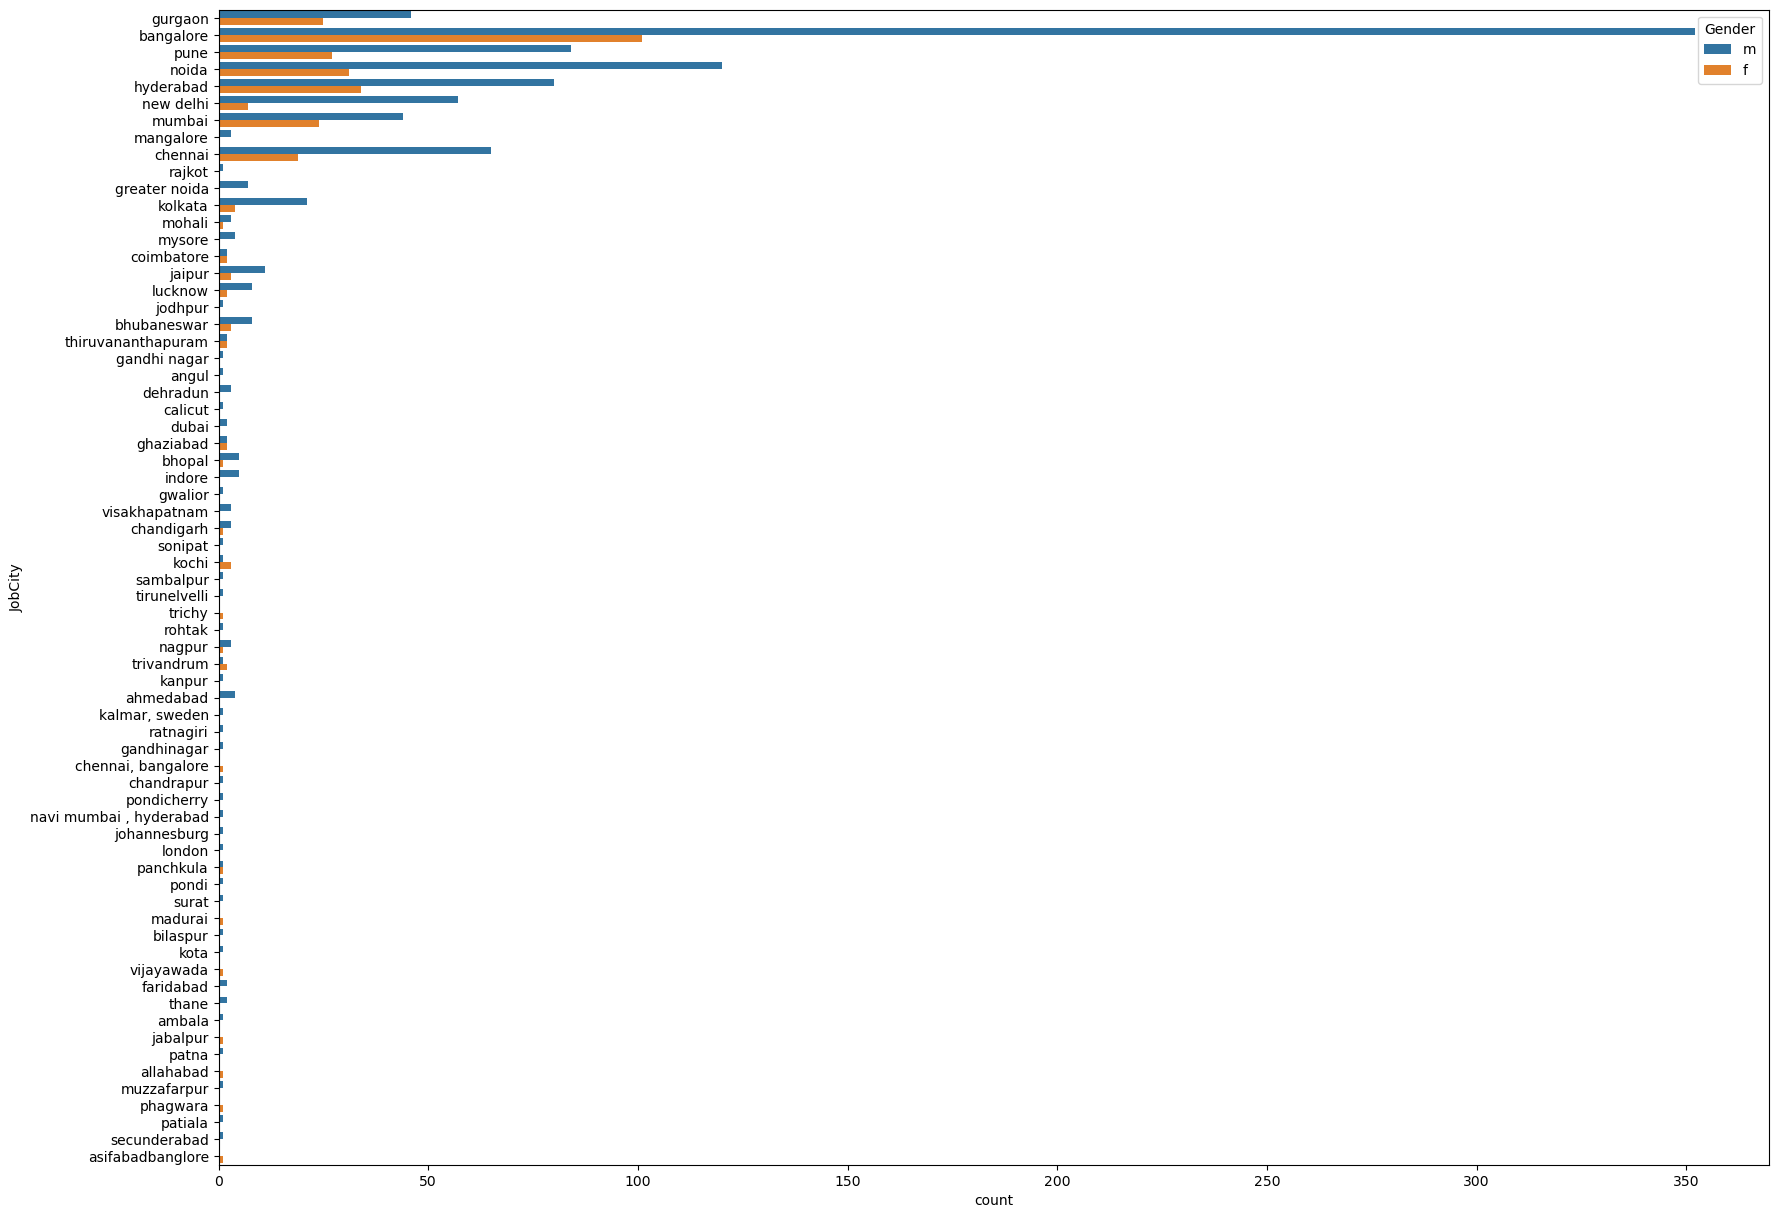

In [135]:
plt.figure(figsize = (20, 15))
sns.countplot(y='JobCity', data=high_Salaries, hue = 'Gender')

- Observations
  1. Most amcat aspirants work in bengaluru,Noida,hyderabad and pune.
  2. 
It is because most of them are from IT domain so majority of them work in these cities


<Axes: xlabel='Period', ylabel='Salary'>

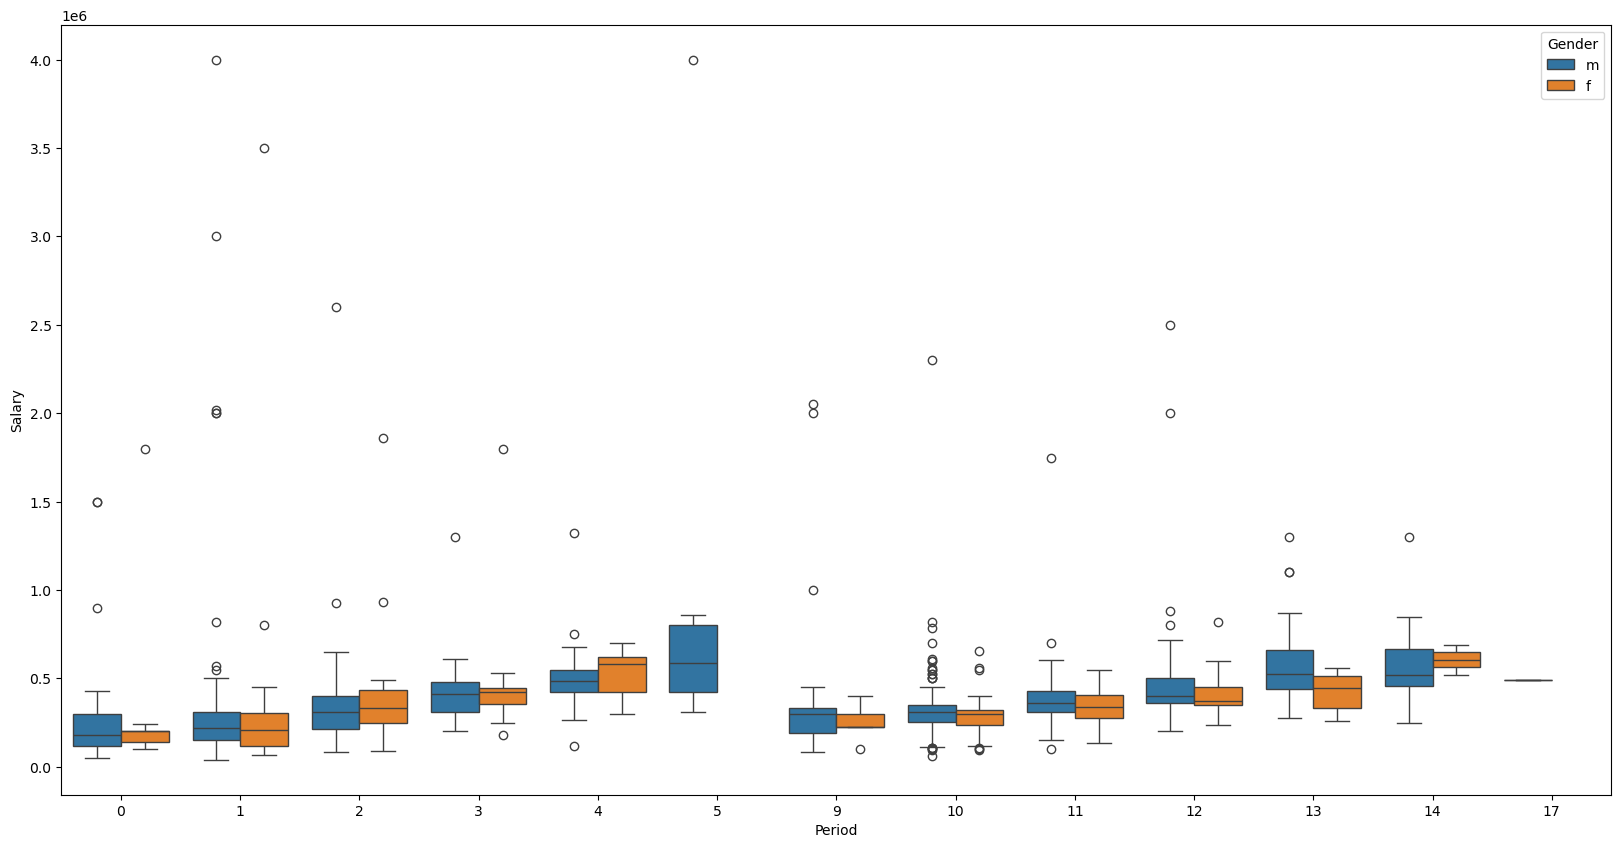

In [137]:
plt.figure(figsize=(20,10))
sns.boxplot(data=high_Salaries,x='Period',y='Salary',hue='Gender')

- Observations
  1. Median salary of both males and females have increased slightly with exp for first five years 
and Decreased suddenly on the 6th year and then same pattern for the following years
  2. 
We can see that men and women having same experience are paid nearly equally around 3.5-5 lak
  3. s
we need to further see the distribution of experience with respect to Designation for both men and wo en
to check whether women are being paid less in a role due to experience.

<Axes: xlabel='Period', ylabel='Designation'>

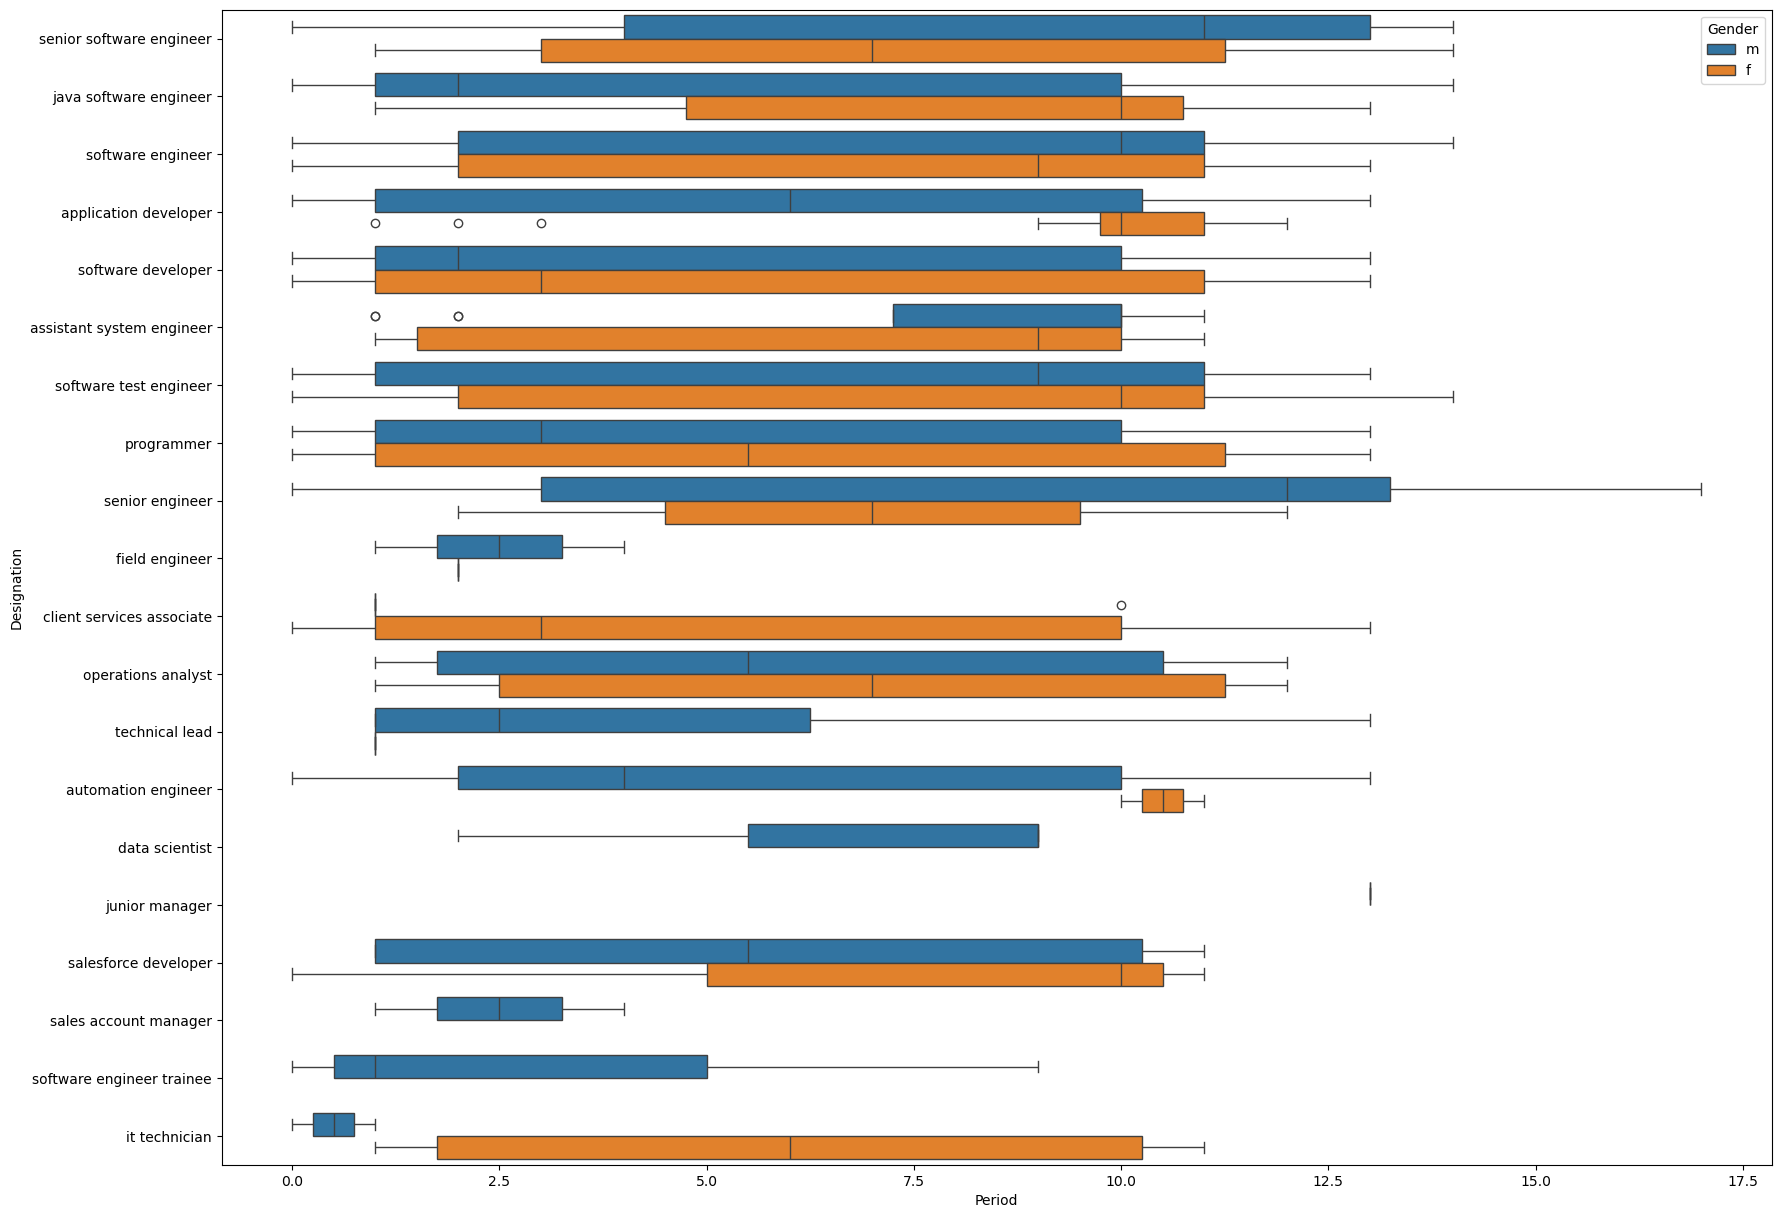

In [139]:
plt.figure(figsize=(20,15))
sns.boxplot(data=high_Salaries,x='Period',y='Designation',hue='Gender')

- Observations
  1. The experience distribution across most designations is skewed, indicating that individuals in each designation have a wide range of both high and low experience levels.
  2. There is a noticeable difference in the median experience between males and females across all designations.
  3. However, this alone is not enough evidence to conclude that salary differences between men and women are primarily due to experience.
  4. In some roles, women with more experience are still paid less than men, and the reverse is also true.
  5. Additionally, experience shows a weak correlation with salary.
  6. The designation with the highest average experience is Senior Engineer.

### Research Questions
### Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, HardwareEngineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”Test this claim with the data given to you.

##### Test this Question

In [143]:
freshers=data[(data["Designation"].isin(["programmer analyst","software engineer","hardware engineer","associate engineer"])) & (data["Period"]==0)]

In [144]:
freshers.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,tenth_percentage,tenth_board,twelfth_graduation_year,twelfth_percentage,twelfth_board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period
508,1272180,310000.000,2014-03-01,2014-06-01,software engineer,gandhi nagar,m,1992,78.150,state board,2009,76.800,state board,412,2,B.Tech/B.E.,Electronics/Telecommunication,6.800,412,0,Gujarat,1970,525,470,595,0.991,-1,516,469,-1,-1,-1,-1,-1.595,-0.287,0.778,0.526,0.672,0
734,983664,300000.000,2015-06-01,2015-06-01,software engineer,noida,m,1993,88.000,cbse,2011,82.000,cbse,387,2,B.Tech/B.E.,Computer Science/Engineering,6.811,387,0,Uttar Pradesh,1970,475,540,450,0.623,435,-1,407,-1,-1,-1,-1,-0.159,-0.454,-0.297,0.526,-1.052,0
888,1035913,110000.000,2014-10-01,2014-02-01,software engineer,pune,m,1991,66.460,state board,2009,62.810,state board,2570,2,B.Tech/B.E.,Computer Science/Engineering,6.151,2570,0,Maharashtra,1970,430,340,370,0.842,515,-1,469,-1,-1,-1,-1,1.564,-0.121,0.010,0.526,0.672,0
1066,196379,300000.000,2012-02-01,2012-04-01,software engineer,bangalore,m,1988,82.000,cbse,2006,65.000,cbse,115,2,MCA,Computer Science/Engineering,6.639,115,0,Punjab,1970,515,585,535,0.952,585,-1,-1,-1,-1,-1,-1,-0.572,1.125,0.817,-0.995,0.186,0
1174,79007,505000.000,2011-01-01,2011-04-01,programmer analyst,gurgaon,m,1987,80.600,icse,2005,91.000,icse,137,2,B.Tech/B.E.,Computer Science/Engineering,7.306,137,0,Uttar Pradesh,1970,485,505,375,0.636,445,-1,-1,-1,-1,-1,-1,0.510,1.749,0.237,-1.230,0.976,0


<Axes: xlabel='Designation', ylabel='Salary'>

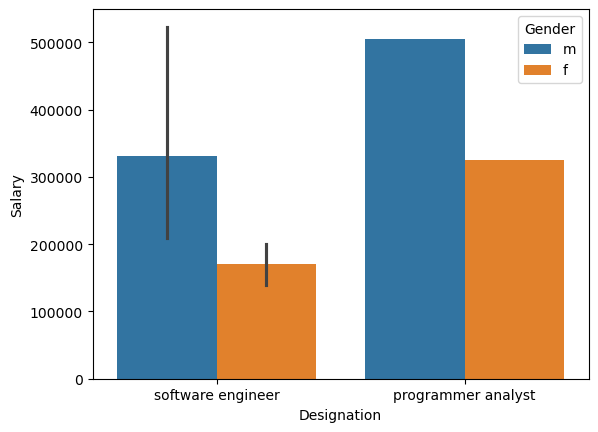

In [145]:
sns.barplot(x="Designation",y="Salary",hue="Gender",data=freshers)

- observation
  1. The salary for freshers starting from around 200k and males are earning more than females as a fresh graduates

- H0 : The average salary of fresh graduates is 250k to 300k
- H1 : The average salary of fresh graduates is not 250k to 300k

In [148]:
from scipy import stats as st
from scipy.stats import chi2_contingency as cst
pv = st.ttest_1samp(freshers['Salary'],popmean=275000)[1]
### for a 95% confidence interval,my p- value should be >0.05 to claim the null hypothesis
if pv < 0.05:
    print('We reject the null hypothesis and Average salary is not equal to 275k')
else:
    print('We fail to reject null hypothesis and Avergage salary is equal to 275k')

We fail to reject null hypothesis and Avergage salary is equal to 275k


#### Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

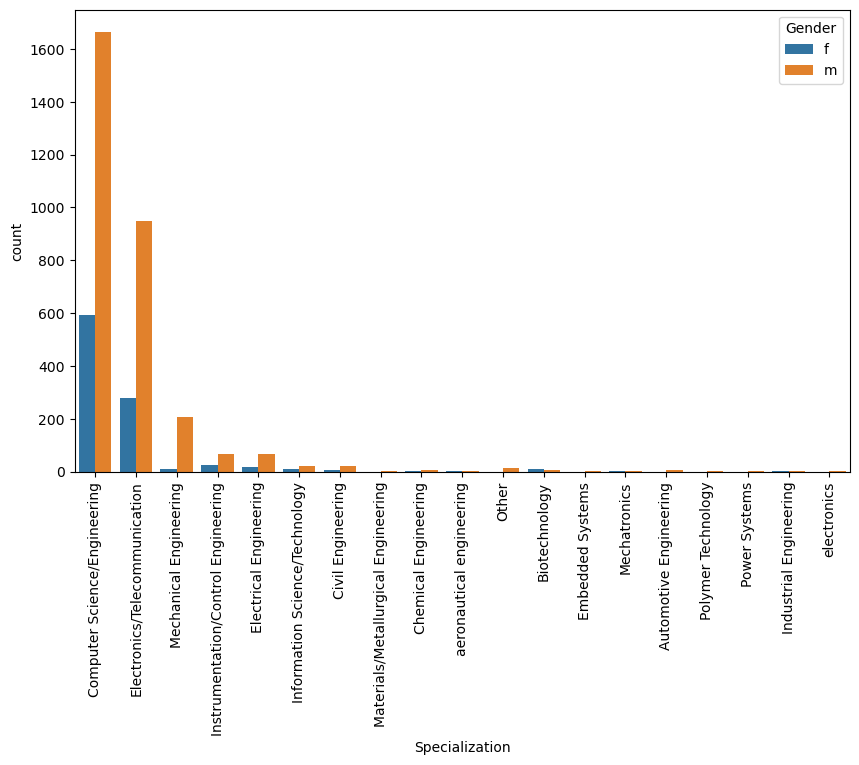

In [150]:
plt.figure(figsize=(10,6))
sns.countplot(x='Specialization',hue='Gender', data=data)
plt.xticks(rotation = 90)
plt.show()

- Most of the Amcat Aspirants are from Computer Science Engineering &Electronics Telecommunication specialization.
- In  most of specializations the males are higher than females
- Let us do a Chi-Square Test to check the relation between Specialization and Gender.

- H0: Gender does not impact specialization- H1s : Gender impacts specialization

In [153]:
gen_spe = pd.crosstab(data['Gender'],data['Specialization'],margins=True)
gen_spe

Specialization,Automotive Engineering,Biotechnology,Chemical Engineering,Civil Engineering,Computer Science/Engineering,Electrical Engineering,Electronics/Telecommunication,Embedded Systems,Industrial Engineering,Information Science/Technology,Instrumentation/Control Engineering,Materials/Metallurgical Engineering,Mechanical Engineering,Mechatronics,Other,Polymer Technology,Power Systems,aeronautical engineering,electronics,All
Gender,,,,,,,,,,,,,,,,,,,,
f,0,11,1,6,593,17,278,0,1,10,26,0,12,1,0,0,0,1,0,957
m,5,6,8,23,1665,67,947,1,2,20,67,3,206,3,13,1,1,2,1,3041
All,5,17,9,29,2258,84,1225,1,3,30,93,3,218,4,13,1,1,3,1,3998


In [154]:

test = cst(gen_spe)[1]
print(test)
if test < 0.05:
    print('Reject the null hypothesis and Gender impacts on specialization')
else:
    print('Fail to reject null hypothesis and Gender does not impact on specialization')

0.0002450485084611527
Reject the null hypothesis and Gender impacts on specialization


### Key Questions to Ask:

1. Which specializations have the most significant gender imbalance in terms of salaries?
2. Are there specializations where female graduates earn salaries comparable to or higher than male graduates?
3. Which specializations show more representation of one gender over the other?

In [156]:
# Grouping by Specialization and Gender to find the average salary

gender_salary_specialization = data.groupby(['Specialization', 'Gender'])['Salary'].mean().unstack()
gender_salary_specialization

Gender,f,m
Specialization,,
Automotive Engineering,NaN,222000.000
Biotechnology,255000.000,265000.000
Chemical Engineering,100000.000,403750.000
Civil Engineering,315000.000,398478.261
Computer Science/Engineering,301551.433,316405.405
Electrical Engineering,387352.941,267537.313
Electronics/Telecommunication,275791.367,300216.473
Embedded Systems,NaN,200000.000
Industrial Engineering,350000.000,355000.000


- Observations
  1. Some roles (e.g., Electrical Engineering) show a higher median salary for women than men, while in many others, men earn more.
  2. In Computer Science/Engineering, men earn slightly more than women, but the difference is relatively small.
  3. In certain specializations (e.g., Automotive Engineering, Polymer Technology, Power Systems, Embedded Systems), salary data is available only for males, showing a gender imbalance.


In [158]:
# Calculate the salary difference between male and female graduates
gender_salary_specialization['Difference'] = gender_salary_specialization['m'] - gender_salary_specialization['f']


In [159]:
# Sort by the absolute salary difference to find the most imbalanced specializations
gender_salary_specialization_sorted = gender_salary_specialization.sort_values(by='Difference', ascending=False)
gender_salary_specialization_sorted

Gender,f,m,Difference
Specialization,,,
Chemical Engineering,100000.000,403750.000,303750.000
Instrumentation/Control Engineering,291730.769,376119.403,84388.634
Civil Engineering,315000.000,398478.261,83478.261
Electronics/Telecommunication,275791.367,300216.473,24425.106
Computer Science/Engineering,301551.433,316405.405,14853.972
Biotechnology,255000.000,265000.000,10000.000
Information Science/Technology,284500.000,292500.000,8000.000
Industrial Engineering,350000.000,355000.000,5000.000
Mechanical Engineering,339583.333,318368.932,-21214.401


- Observstions
  1. The most significant salary gaps favor men in fields like Chemical Engineering and Instrumentation/Control Engineering.
  2. However, women earn more in specializations like Electrical Engineering, Mechatronics, and Aeronautical Engineering.
  3. Despite these positive deviations for women, there are still significant gaps in high-paying roles, mostly favoring men.

In [161]:
# Find specializations where female salary is equal to or higher than male salary
female_higher_salaries = gender_salary_specialization[gender_salary_specialization['f'] >= gender_salary_specialization['m']]

# Display these specializations
female_higher_salaries


Gender,f,m,Difference
Specialization,,,
Electrical Engineering,387352.941,267537.313,-119815.628
Mechanical Engineering,339583.333,318368.932,-21214.401
Mechatronics,350000.000,221666.667,-128333.333
aeronautical engineering,180000.000,132500.000,-47500.000


- Observations
  1. These specializations show significant salary advantage for women, suggesting that they might excel in these fields despite traditional gender imbalances.
  2. However, these could also be outliers due to smaller sample sizes for women.

In [163]:
# Count the number of male and female graduates in each specialization
gender_count_specialization = data.groupby(['Specialization', 'Gender'])['Salary'].count().unstack()

# Add a column to show the percentage of females in each specialization
gender_count_specialization['Female_Percentage'] = (gender_count_specialization['f'] / 
                                                    (gender_count_specialization['f'] + gender_count_specialization['m'])) * 100

# Sort by the percentage of females
gender_representation_sorted = gender_count_specialization.sort_values(by='Female_Percentage', ascending=False)

# Display the result
gender_representation_sorted


Gender,f,m,Female_Percentage
Specialization,,,
Biotechnology,11.000,6.000,64.706
Industrial Engineering,1.000,2.000,33.333
Information Science/Technology,10.000,20.000,33.333
aeronautical engineering,1.000,2.000,33.333
Instrumentation/Control Engineering,26.000,67.000,27.957
Computer Science/Engineering,593.000,1665.000,26.262
Mechatronics,1.000,3.000,25.000
Electronics/Telecommunication,278.000,947.000,22.694
Civil Engineering,6.000,23.000,20.690


- Observations
  1. Biotechnology is the most female-dominated specialization, with nearly two-thirds of graduates being women.
  2. Mechanical Engineering and Chemical Engineering are male-dominated, with women making up a small percentage of graduates.
  3. Despite fewer women in Mechatronics, they seem to earn significantly more than men in this field, highlighting the potential for gender-based salary inequality even in fields with low female representation.


### Overall Observations:

- The data indicates a gender imbalance both in terms of representation and salaries. In several specializations, men outnumber women significantly, which could affect overall salary averages and perceptions of pay gaps.
- Salary disparities still exist in male-dominated fields, but in some areas, women are out-earning their male counterparts. However, this is not enough to conclude that women are generally better compensated, as the imbalance remains prevalent.